In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

def check_condition(condition, x):
    if isinstance(condition, str):
        # Vérifier si la condition commence par '<'
        if condition.startswith("<"):
            limit = int(condition[1:])  # Extraire la valeur après "<"
            return x < limit  # Retourne True si x est inférieur à la limite
        # Vérifier si la condition commence par '>'
        elif condition.startswith(">"):
            limit = int(condition[1:])  # Extraire la valeur après ">"
            return x > limit  # Retourne True si x est supérieur à la limite
        # Vérifier si la condition est de la forme "[min, max]"
        elif condition[0] == "[" and condition[-1] == "]":
            bounds = condition[1:-1].split(",")  # Séparer par la virgule
            lower = int(bounds[0].strip())  # Extraire et parser le premier nombre
            upper = int(bounds[1].strip())  # Extraire et parser le deuxième nombre
            return lower <= x <= upper  # Retourne True si x est dans l'intervalle
        else:
            raise ValueError("Format de chaîne invalide")
    elif isinstance(condition, (int, float)):  # Si la condition est un int ou float
        return x == condition  # Comparer directement x avec la condition
    else:
        raise ValueError("Condition doit être une chaîne de caractères ou un nombre (int ou float)")

def extract_triples(date, nom, mup=None, T=None, x0=None ,Taille=None):
    triples = {}  # Utiliser un ensemble pour éviter les doublons
    
    # Parcourir les fichiers dans le répertoire spécifié par date
    for filename in os.listdir(date):
        # Vérifier si le nom du fichier correspond au format attendu
        if nom ==  "theta_edge_1.0_ih1" :
            match = re.match(rf"density_expansion_nu_{re.escape(nom)}_([\d.]+)_([\d.]+)\_veff_bord.npz", filename)
            if match:
                file_mup = float(match.group(1))
                file_T = float(match.group(2))
                # Vérifier si les valeurs correspondent aux critères spécifiés
                
                if (mup is None or check_condition(mup, file_mup)) and (T is None or check_condition(T, file_T)):
                    triples[(file_mup, file_T)] = extract_t_times_Taille(date, nom, (file_mup, file_T))
        elif nom == "theta_edge_1.0_ih2" :
            match = re.match(rf"density_expansion_nu_{re.escape(nom)}_([\d.]+)_([\d.]+)_([\d.]+)_([\d.]+)_([\d.]+)\.npz", filename)
            if match:
                file_mup = float(match.group(1))
                file_T = float(match.group(2))
                file_x0 = float(match.group(3))
                file_Taille = float(match.group(4))
                # Vérifier si les valeurs correspondent aux critères spécifiés
                if (mup is None or check_condition(mup, file_mup)) and (T is None or check_condition(T, file_T)) and (x0 is None or check_condition(x0, file_x0)) and (Taille is None or check_condition(Taille, file_Taille)):
                    triples[(file_mup, file_T,file_x0, file_Taille)] = extract_t_times_Taille(date, nom, (file_mup, file_T,file_x0, file_Taille))
    
    return triples

def extract_triples(date, nom, mup=None, T=None, x0=None, Taille=None):
    triples = {}  # Utiliser un dictionnaire pour stocker les résultats
    
    # Parcourir les fichiers dans le répertoire spécifié par 'date'
    for filename in os.listdir(date):
        # Vérifier si le nom du fichier correspond à un format attendu
        if nom == "theta_edge_1.0_ih1":
            # Expression régulière pour capturer les valeurs de mup et T (négatif ou positif)
            match = re.match(rf"density_expansion_nu_{re.escape(nom)}_([-]?\d+\.\d+)_([-]?\d+\.\d+)_veff_bord.npz", filename)
            if match:
                file_mup = float(match.group(1))  # Extraire mup et convertir en float
                file_T = float(match.group(2))    # Extraire T et convertir en float
                
                # Vérifier si les valeurs correspondent aux critères spécifiés
                if (mup is None or check_condition(mup, file_mup)) and (T is None or check_condition(T, file_T)):
                    triples[(file_mup, file_T)] = extract_t_times_Taille(date, nom, (file_mup, file_T))

        elif nom == "theta_edge_1.0_ih2":
            # Expression régulière pour capturer les valeurs de mup, T, x0 et Taille (négatif ou positif)
            match = re.match(rf"density_expansion_nu_{re.escape(nom)}_([-]?\d+\.\d+)_([-]?\d+\.\d+)_([-]?\d+\.\d+)_([-]?\d+\.\d+)_([-]?\d+\.\d+)\.npz", filename)
            if match:
                file_mup = float(match.group(1))    # Extraire mup et convertir en float
                file_T = float(match.group(2))      # Extraire T et convertir en float
                file_x0 = float(match.group(3))     # Extraire x0 et convertir en float
                file_Taille = float(match.group(4)) # Extraire Taille et convertir en float
                
                # Vérifier si les valeurs correspondent aux critères spécifiés
                if (mup is None or check_condition(mup, file_mup)) and \
                   (T is None or check_condition(T, file_T)) and \
                   (x0 is None or check_condition(x0, file_x0)) and \
                   (Taille is None or check_condition(Taille, file_Taille)):
                    triples[(file_mup, file_T, file_x0, file_Taille)] = extract_t_times_Taille(date, nom, (file_mup, file_T, file_x0, file_Taille))

    return triples

def extract_t_times_Taille(date, nom, triple):
    
    t_times_Taille_values = set()  # Utiliser un ensemble pour éviter les doublons
    
    # Construire le motif de recherche pour le nom de fichier
    if nom ==  "theta_edge_1.0_ih1" :
        mup, T = triple
        pattern = rf"density_expansion_nu_{re.escape(nom)}_{mup:.3f}_{T:.3f}_([\d.]+)\.npz"
       
    elif nom ==  "theta_edge_1.0_ih2" :
        mup, T, x0, Taille = triple
        pattern = rf"density_expansion_nu_{re.escape(nom)}_{mup:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_([\d.]+)\.npz"
    # Parcourir les fichiers dans le répertoire spécifié par date
    for filename in os.listdir(date):
        # Vérifier si le nom du fichier correspond au format attendu
        match = re.match(pattern, filename)
        if match:
            t_times_Taille = float(match.group(1))
            t_times_Taille_values.add(t_times_Taille)
    
    return sorted(t_times_Taille_values)



def compare_condition(value, condition):
    """
    Fonction utilitaire pour comparer une valeur avec une condition.
    La condition peut être:
    - Une liste de valeurs : check si value est dans la liste
    - Une fonction lambda ou un string avec des opérateurs (">", "<", etc.)
    """
    if isinstance(condition, list):
        return value in condition
    elif callable(condition):
        return condition(value)
    elif isinstance(condition, str):
        # On supporte les conditions sous forme de string (ex: '>' ou '<')
        if condition == ">":
            return value > 0
        elif condition == "<":
            return value < 0
        elif condition == "=":
            return value == 0
    return False  # Par défaut, ne pas accepter

def extract_triples_2(date, nom, mup=None, T=None, Taille=None,
                    condition_mup=None, condition_T=None, condition_Taille=None):
    """
    Extrait les triples de fichiers en fonction des conditions données.
    Conditions peuvent être une valeur, une liste de valeurs ou une fonction de comparaison.
    """
    triples = {}
    
    # Parcourir les fichiers dans le répertoire spécifié par date
    for filename in os.listdir(date):
        # Vérifier si le nom du fichier correspond au format attendu
        match = re.match(rf"density_expansion_nu_{re.escape(nom)}_([\d.]+)_([\d.]+)_([\d.]+)_([\d.]+)\.npz", filename)
        if match:
            file_mup = float(match.group(1))
            file_T = float(match.group(2))
            file_Taille = float(match.group(3))
            
            # Vérifier les conditions
            if (condition_mup is None or compare_condition(file_mup, condition_mup)) and \
               (condition_T is None or compare_condition(file_T, condition_T)) and \
               (condition_Taille is None or compare_condition(file_Taille, condition_Taille)):
                triples[(file_mup, file_T, file_Taille)] = extract_t_times_Taille(date, nom, (file_mup, file_T, file_Taille))   
    
    return triples

def save_figure(fig, directory_path, file_name):
    """
    Enregistre la figure dans le répertoire spécifié avec le nom de fichier spécifié.

    Args:
        fig (matplotlib.figure.Figure): La figure à enregistrer.
        directory_path (str): Le chemin du répertoire où enregistrer la figure.
        file_name (str): Le nom du fichier à utiliser pour enregistrer la figure.
    """
    # Assurez-vous que le répertoire existe
    os.makedirs(directory_path, exist_ok=True)
    
    # Concaténer le chemin du répertoire avec le nom du fichier
    file_path = os.path.join(directory_path, file_name)
    
    # Enregistrer la figure dans le fichier spécifié
    fig.savefig(file_path)
    
    # Afficher un message de confirmation
    print(f"La figure a été enregistrée dans {file_path}")


def plot_graph1(date, nom, triple, time_list):
    mu, T, x0 , Taille = triple

    # Charger les données
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore

    theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
    nu_discr = np.load(f"{date}/nu_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz")
    rho_s_discr = np.load(f"{date}/rho_s_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz")
    rho_discr = np.load(f"{date}/rho_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz")
    theta_star = np.load(f"{date}/{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz")
    
    nu_theta_star_discr = np.load(f"{date}/nu_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz")
    rho_s_theta_star_discr = np.load(f"{date}/rho_s_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz")
    rho_theta_star_discr = np.load(f"{date}/rho_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz")
    
    nu_theta_discr_moy = np.load(f"{date}/nu_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}.npz")
    rho_s_theta_discr_moy = np.load(f"{date}/rho_s_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}.npz")
    rho_theta_discr_moy = np.load(f"{date}/rho_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}.npz")
    #print ( 'theta star = ' , theta_star)

    # Tracer les graphiques
    #plt.plot(theta_discr, nu_discr, label='$\\nu$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK'.format(mu, T))
    plt.plot(theta_discr, rho_discr, label='$\\rho$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK'.format(mu, T))
   # plt.plot(theta_discr, nu_theta_star_discr, label='$\\nu_\\star$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK, $x_0$ = {:.3f}$\\mu$m'.format(mu, T, x0))
    plt.plot(theta_discr, rho_s_theta_star_discr, label='$\\rho_s^\\star$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK, $x_0$ = {:.3f}$\\mu$m'.format(mu, T, x0))
    plt.plot(theta_discr, rho_theta_star_discr, label='$\\rho^\\star$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK, $x_0$ = {:.3f}$\\mu$m'.format(mu, T, x0))
    #plt.plot(theta_discr, nu_theta_discr_moy, label='$\\nu_\\star$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK, $x_0$ = {:.3f}$\\mu$m, $\\ell$ = {:.3f} $\\mu$m'.format(mu, T, x0, Taille))
    plt.plot(theta_discr, rho_s_theta_discr_moy, label='$\\Pi_s^\\star$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK, $x_0$ = {:.3f}$\\mu$m, $\\ell$ = {:.3f} $\\mu$m'.format(mu, T, x0, Taille))
    plt.plot(theta_discr, rho_theta_discr_moy, label='$\\Pi^\\star$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK, $x_0$ = {:.3f}$\\mu$m, $\\ell$ = {:.3f} $\\mu$m'.format(mu, T, x0, Taille))
    plt.xlabel('$\\theta\quad (\\mu m/ ms ) $')
    plt.ylabel('$f$')
    #plt.title(f"$\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK")
 
import numpy as np

def calculate_chi_square(observed_x, observed_y, simulated_x, simulated_y):
    """
    Calcule le chi-square entre les données observées et les valeurs simulées en effectuant une interpolation linéaire.
    
    Args:
        observed_x (array-like): Les abscisses des données observées.
        observed_y (array-like): Les ordonnées des données observées.
        simulated_x (array-like): Les abscisses des valeurs simulées.
        simulated_y (array-like): Les ordonnées des valeurs simulées.
        
    Returns:
        float: La valeur du chi-square.
    """
    observed_x = np.array(observed_x)
    observed_y = np.array(observed_y)
    from scipy.signal import savgol_filter
    observed_y = np.array(savgol_filter(observed_y, 2, 1))
    simulated_x = np.array(simulated_x)
    simulated_y = np.array(simulated_y)
    
    #print('len(observed_x)' , len(observed_x))
    if len(observed_x) == 0 : return None
    
    # Interpoler les valeurs simulées aux abscisses des données observées
    interpolated_simulated_y = np.interp(observed_x, simulated_x, simulated_y)
    #print ('jj' , interpolated_simulated_y)
    flag_plot = (1==0) 
    #print ("flag_plot : " , flag_plot)
    if flag_plot :
    
        plt.plot(simulated_x ,simulated_y , label ='sul')
        plt.plot(observed_x , observed_y, label = 'data' )
        plt.plot(observed_x , interpolated_simulated_y, label = 'data s' )
        plt.title('interpolation')
        plt.legend()
        plt.show()
    
    # Calculer le chi-square
    # Calculer le chi-square en excluant les zéros
    mask = interpolated_simulated_y != 0
    #chi_square = np.sum(((observed_y - interpolated_simulated_y)**2 / interpolated_simulated_y)[mask])
    chi_square = np.sum((observed_y - interpolated_simulated_y)**2)
    return chi_square


import numpy as np

import numpy as np
import matplotlib.pyplot as plt

def calculate_max_epsilon_with_plot(observed_x, observed_y, simulated_x, simulated_y):
    """
    Calcule la plus grande valeur de epsilon qui permet à simulated_y de rester dans le tube défini par observed_y ± epsilon,
    et trace le graphique avec les courbes et le remplissage de l'écart.
    
    Args:
        observed_x (array-like): Les abscisses des données observées.
        observed_y (array-like): Les ordonnées des données observées.
        simulated_x (array-like): Les abscisses des valeurs simulées.
        simulated_y (array-like): Les ordonnées des valeurs simulées.
        
    Returns:
        float: La plus petite valeur de epsilon qui satisfait la condition.
    """
    # Convertir les entrées en tableaux numpy
    observed_x = np.array(observed_x)
    observed_y = np.array(observed_y)
    simulated_x = np.array(simulated_x)
    simulated_y = np.array(simulated_y)
    
    # Vérifier que les données ne sont pas vides
    if len(observed_x) == 0:
        return None
    
    # Interpoler les valeurs simulées sur les abscisses des données observées
    interpolated_simulated_y = np.interp(observed_x, simulated_x, simulated_y)
    
    # Calculer la plus grande valeur de epsilon nécessaire pour que simulated_y soit dans le tube
    epsilon = np.max(np.abs(interpolated_simulated_y - observed_y))

    plot_f = False 
    if plot_f : 
        # Tracer les données observées, simulées et le tube
        plt.figure(figsize=(10, 6))
    
        # Tracer la courbe des données observées
        plt.plot(observed_x, observed_y, label="Observed Data", color='blue', lw=2)
        
        # Tracer la courbe des données simulées
        plt.plot(simulated_x, simulated_y, label="Simulated Data", color='green', lw=2)
    
        # Tracer la courbe des données simulées interpolées
        plt.plot(observed_x, interpolated_simulated_y, label="Interpolated Simulated Data", color='orange', lw=2)
    
        # Remplir le tube entre observed_y - epsilon et observed_y + epsilon
        plt.fill_between(observed_x, observed_y - epsilon, observed_y + epsilon, color='gray', alpha=0.3, label="Tube (±ε)")
    
        # Ajouter des titres et des labels
        plt.title('Comparison of Observed and Simulated Data with ε Tube')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.grid(True)

    # Afficher le graphique
    plt.show()
    
    # Retourner la valeur de epsilon
    return epsilon


def calculate_chi_2_max(observed_x, observed_y, simulated_x, simulated_y , p = 2  , plot_flag = False  ):
    """
    Calcule la plus grande valeur de epsilon qui permet à simulated_y de rester dans le tube défini par observed_y ± epsilon,
    et trace le graphique avec les courbes et le remplissage de l'écart.
    
    Args:
        observed_x (array-like): Les abscisses des données observées.
        observed_y (array-like): Les ordonnées des données observées.
        simulated_x (array-like): Les abscisses des valeurs simulées.
        simulated_y (array-like): Les ordonnées des valeurs simulées.
        
    Returns:
        float: La plus petite valeur de epsilon qui satisfait la condition.
    """
    # Convertir les entrées en tableaux numpy
    observed_x = np.array(observed_x)
    observed_y = np.array(observed_y)
    simulated_x = np.array(simulated_x)
    simulated_y = np.array(simulated_y)
    
    # Vérifier que les données ne sont pas vides
    if len(observed_x) == 0:
        return None
    
    # Interpoler les valeurs simulées sur les abscisses des données observées
    interpolated_simulated_y = np.interp(observed_x, simulated_x, simulated_y)

    if p == 0:
        # Norme définie comme infinie (cas particulier)
        norme = lambda x: float('inf')
    elif p == float('inf'):
        # Norme infinie : maximum des valeurs absolues des éléments de x
        norme = lambda x: np.max(np.abs(x))
    else:
        # Norme p-généralisée : (somme des |x_i|^p)^(1/p)
        norme = lambda x: np.power(np.sum(np.power(np.abs(x), p)), 1/p)

    
    # Calculer la plus grande valeur de epsilon nécessaire pour que simulated_y soit dans le tube
    epsilon = norme((interpolated_simulated_y - observed_y)/interpolated_simulated_y)

    #plot_flag  = True #False 
    if plot_flag : 
        # Tracer les données observées, simulées et le tube
        plt.figure(figsize=(10, 6))

        epsilon0 = norme(interpolated_simulated_y - observed_y)
    
        # Tracer la courbe des données observées
        plt.plot(observed_x, observed_y, label="Observed Data", color='blue', lw=2)
        
        # Tracer la courbe des données simulées
        plt.plot(simulated_x, simulated_y, label="Simulated Data", color='green', lw=2)
    
        # Tracer la courbe des données simulées interpolées
        plt.plot(observed_x, interpolated_simulated_y, label="Interpolated Simulated Data", color='orange', lw=2)
    
        # Remplir le tube entre observed_y - epsilon et observed_y + epsilon
        plt.fill_between(observed_x, observed_y - epsilon0, observed_y + epsilon0, color='gray', alpha=0.3, label="Tube (±ε)")
    
        # Ajouter des titres et des labels
        plt.title('Comparison of Observed and Simulated Data with ε Tube')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.grid(True)

        # Tracer les données observées, simulées et le tube
        plt.figure(figsize=(10, 6))

    
        # Tracer la courbe des données simulées interpolées
        plt.plot(observed_x, (interpolated_simulated_y - observed_y)/interpolated_simulated_y, label="Pour norme ", color='orange', lw=2)
    
        # Remplir le tube entre observed_y - epsilon et observed_y + epsilon
        plt.fill_between(observed_x, - epsilon,  + epsilon, color='gray', alpha=0.3, label="Tube (±ε)")
    
        # Ajouter des titres et des labels
        plt.title('Comparison of Observed and Simulated Data with ε Tube')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.grid(True)

    # Afficher le graphique
    plt.show()
    
    # Retourner la valeur de epsilon
    return epsilon**2



def dupliquer_donnees(input_filename, nom_donnee, output_filename):
    # Charger les données à partir du fichier npz
    donnees = np.load(input_filename)
    
    # Extraire les données du fichier
    donnees_a_dupliquer = donnees[nom_donnee]
    
    # Dupliquer les données
    donnees_dupliquees = np.concatenate((donnees_a_dupliquer, donnees_a_dupliquer))
    
    # Enregistrer les données dupliquées dans un nouveau fichier npz
    np.savez(output_filename, **{nom_donnee: donnees_dupliquees})




def plot_graph2(date, nom, triple, time_list , DONNEES  , id_donnes = -1):
    mu, T, x00, Taille = triple
    # Charger les données
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    # Créer un graphique pour la densité multipliée par le temps en fonction de la position/temps
    
    filename = f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz"
    print ( 'filename =' ,filename )
    theta_discr = np.load(filename)
    ax1.set(xlabel="$x/\\tau\quad (\mu m / ms ) $", ylabel="$n(x)*\\tau/\ell\quad ( ms/\mu m^2 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x00:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")
    
    if date_donnees == '2024-02-09': t  = 50
    elif date_donnees == '2024-02-29':t = 50
    elif date_donnees == '2024-04-24':t = 30
    else : t = time_list[-1] 
    
    if DONNEES != None :
        for Donnees in [DONNEES[id_donnes]] :        
            X , Y , label = Donnees
            if date_donnees == '2024-02-09':x0 = 76.25 - 6.82
            elif date_donnees == '2024-02-29':x0 = - 6
            elif date_donnees == '2024-04-24':x0 = 0 
            else :x0 = X[np.argmax(Y)]
            X = X-x0
            ax1.plot(X/t, Y*t/Taille, label=label)
    #print ( 'mu , T , Taille = ' , mu, T, Taille)
    #print ( 'time_list , ' , time_list)
    for t in time_list:
        filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x00:.3f}_{Taille:.3f}_{t:.3f}.npz"
        print ( 'filename =' ,filename )
        data_s = np.load(filename) 
        x0 = data_s[0,np.argmax(data_s[1, :])]
        x0 =0
        X_simul = data_s[0, :] - x0
        #print ( data_s , data_s.size )
        ax1.plot(X_simul/t*Taille, data_s[1, :]*t/Taille, label=f"$GHD : \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK , $x_0$ = {x00:.3f} $\\mu$m , $\\ell$ = {Taille:.3f} $\\mu$m , $\\tau$ = {t:.3f} $m$s")
    
    ta = time_list[0]
    filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x00:.3f}_{Taille:.3f}_{ta:.3f}.npz"
    print ( 'filename =' ,filename )
    data_s = np.load(filename) 
    x0 = data_s[0,np.argmax(data_s[1, :])]
    x0 =0
    X_simul = data_s[0, :] - x0
    
    np.savez(f"PourIsa/donne.npz", [X/t , Y*t/Taille])
    np.savez(f"PourIsa/simul_mu-{mu:.3f}_T-{T:.3f}_Taille-{Taille:.3f}_.npz", [X_simul/ta*Taille , data_s[1, :]*t/Taille])
    
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x00:.3f}.npz"
    print ( 'filename =' ,filename )
    rho_theta_star_discr = np.load(filename)
    filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x00:.3f}_{Taille:.3f}.npz"
    print ( 'filename =' ,filename )
    rho_theta_discr_moy = np.load(filename)
    theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
    theta0 =  0 
    ax1.plot(theta_discr-theta0, rho_theta_star_discr, label=f"$\\rho^\\star : \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0$ = {x00:.3f} $\\mu$m")
    ax1.plot(theta_discr-theta0, rho_theta_discr_moy, label=f"$\\Pi^\\star : \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0$ = {x00:.3f} $\\mu$m , $\\ell$ = {Taille:.3f} $\\mu$m")
    
    if DONNEES != None : 
        if date_donnees == '2024-02-09':mask = (X>-200)*(X<50)       
        #print ( ' mask :' , mask )
        if id_donnes == -1 : return calculate_chi_square(X[mask]/t, Y[mask]*t/Taille, X_simul/t*Taille , data_s[1, :]*t/Taille)
        if id_donnes == 1 : 
            print ( id_donnes)
            return calculate_chi_square(X[mask]/t, Y[mask], X_simul, data_s[1, :])
    return 0

def plot_graph3(date, nom, triple, time_list , DONNEES):
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    mu, T, x00, Taille = triple
    theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
    ax1.set(xlabel="$x \quad (\mu m)  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$, $x_0 =$ {x00:.3f} $\mu m$ , $\\ell =$ {Taille:.3f} $\mu m$")
    
    if DONNEES != None :
        for Donnees in DONNEES[-2:-1] :        
            X , Y , label = Donnees
            if date_donnees == '2024-02-09':x0 = 76.25 - 6.82
            elif date_donnees == '2024-02-29':x0 = - 6
            elif date_donnees == '2024-04-24':x0 = 0    
            else :x0 = X[np.argmax(Y)]            
            ax1.plot((X-x0), Y, label=label)
    for t in time_list:
        filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x00:.3f}_{Taille:.3f}_{t:.3f}.npz"
        data_s = np.load(filename) 
        #np.savez(f"density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz", data_s)
        x0 = data_s[0,np.argmax(data_s[1, :])]
        #print ( "data_s : ", data_s)
        x0=0
        X_simul = data_s[0, :] - x0
        if t > -1 and 1 == 0 : 
            if date_donnees == '2024-02-09': t2  = 50
            elif date_donnees == '2024-02-29':t2 = 50
            elif date_donnees == '2024-04-24':t2 = 30
            else : t2 = time_list[-1] 
            ax1.plot(X_simul*Taille/t*t2, data_s[1, :]*t/t2, label=f"$\\rho$ , $n$ , $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK,  $x_0 =$ {x00:.3f} $\mu m$ ,  $\\ell$ = {Taille:.3f} $\\mu$m , $\\tau$ = {t:.3f} $m$s")
        else : ax1.plot(X_simul*Taille, data_s[1, :], label=f"GHD : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0 =$ {x00:.3f} $\mu m$ , $\\ell$ = {Taille:.3f} $\\mu$m , $\\tau$ = {t:.3f} $m$s")
        
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    rho_theta_star_discr = np.load(f"{date}/rho_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x00:.3f}.npz")
    theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
    theta0 = 0 
    #ax1.plot((theta_discr - theta0)*t2, rho_theta_star_discr, label=f"$\\rho^\\star \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m")


import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad

def integrale(x, y , window_size = 3, poly_order = 2,  plt_flag = 0 ):
    # Interpolation des données
    from scipy.signal import savgol_filter
    #window_size = 3  # Taille de la fenêtre
    #poly_order = 2   # Degré du polynôme
    y_smooth = savgol_filter(y, window_length=window_size, polyorder=poly_order)
    f_interp = interp1d(x, np.where(y_smooth>0 , y_smooth , 0 ) , kind='linear')

    # Définir la fonction à intégrer
    def f(x):
        return f_interp(x)

    # Intégration sur un intervalle fini
    integral_value, _ = quad(f, np.min(x), np.max(x), epsabs=1e-8, epsrel=1e-8)
    
    #plt_flag = 1 
    if plt_flag :
        # Afficher le résultat
        print("Valeur de l'intégrale sur l'intervalle fini:", integral_value)

        # Tracer x par rapport à y
        plt.figure(figsize=(10, 5))
        plt.scatter(x, y,   color = "black" , marker='o' , linestyle=':',linewidth=1.5, alpha=0.5 , label="y"  )
    
        # Tracer x par rapport à f(x)
        x_values = np.linspace(np.min(x), np.max(x), 100)
        plt.plot(x_values, f_interp(x_values) , color = "blue" , linestyle='-', linewidth=1.5, alpha=1 , label="f(x)" )
    
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()
    
    return integral_value
    
def plot_Nat(date, nom, triple, time_list , DONNEES):
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    mu, T, x00, Taille = triple
    from scipy.signal import savgol_filter
    
    if DONNEES != None :
        Donnees=DONNEES[-2]         
        X , Y , label = Donnees
        mask = (X > -20)*(X < 60)
        Nat_donnees0 = integrale(X[mask], Y[mask])
        Donnees=DONNEES[-1]         
        X , Y , label = Donnees
        mask = (X > -400)*(X < 400)
        Nat_donnees1 = integrale(X[mask], Y[mask])
    NAT = []
    for t in time_list :
        filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x00:.3f}_{Taille:.3f}_{t:.3f}.npz"
        print(filename)
        data_s = np.load(filename) 
        x0 = data_s[0,np.argmax(data_s[1, :])]
        x0 = 0 
        X = (data_s[0, :] - x0)*Taille
        Y = data_s[1, :]
        NAT.append(integrale(X, Y))
        #NAT.append(sum(Y))
        if t == 0 :
            fig2, ax2 = plt.subplots()
            ax2.set(xlabel="$x \quad (\mu m )  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$, $x_0 =$ {x00:.3f} $\mu m$ , $\\ell =$ {Taille:.3f} $\mu m$")
            ax2.plot(DONNEES[-2][0] , DONNEES[-2][1] , label = DONNEES[-2][2])
            ax2.plot(X ,Y , label = " simule coupure 2 : $\tau = 0 ms$ ")
            plt.grid(True)
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
            plt.show()
        if t >= max(time_list) :
            fig2, ax2 = plt.subplots()
            ax2.set(xlabel="$x \quad (\mu m )  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$, $x_0 =$ {x00:.3f} $\mu m$ , $\\ell =$ {Taille:.3f} $\mu m$")
            ax2.plot(DONNEES[-1][0] , DONNEES[-1][1] , label = DONNEES[-1][2])
            ax2.plot(X ,Y , label = f" simule coupure 2 : $\tau = {t:.3f} ms$ ")
            plt.grid(True)
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
            plt.show()
    fig, ax1 = plt.subplots()
    ax1.set(xlabel="$t \quad (ms)  $", ylabel="$(N/N_{0}-1)*100$", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x00:.3f} $\mu m$, $\\ell =$ {Taille:.3f} $\mu m$")
    ax1.plot(time_list , (np.array(NAT)/NAT[0]-1)*100 , label = "$N$ : simule , $N_{0}$: pour simul à $\\tau = 0 ms$ ")
    print("la deviation GHD est : ",(NAT[-1]/NAT[0]-1)*100 )
    if DONNEES != None : 
        ax1.plot(time_list , (np.array(NAT)/Nat_donnees0-1)*100 , label = "$N$ : simule , $N_{0}$: donné à $\\tau = 1 ms$ ")
        ax1.plot(time_list , (np.array(NAT)/Nat_donnees1-1)*100 , label = "$N$ : simule , $N_{0}$: donné à $\\tau = 30 ms$ ")
        ax1.plot([1 , max(time_list)], (np.array([1 , Nat_donnees1/Nat_donnees0])-1)*100 , label = "$N$ : donnees , $N_{0}$: donné à $\\tau = 1 ms$ ")
        ax1.axhline(y=(NAT[0]/NAT[0]-1)*100, color='r', linestyle='--')
    plt.grid(True)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
    plt.show()
    
def plot_graph4(date, nom, triple, time_list , DONNEES):
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    mu, T, x00, Taille = triple
    theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
    ax1.set(xlabel="$x \quad (\mu m)  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$, $x_0 =$ {x00:.3f} $\mu m$ , $\\ell =$ {Taille:.3f} $\mu m$")
    
    if DONNEES != None :
        for Donnees in DONNEES[-2:] :        
            X , Y , label = Donnees
            if date_donnees == '2024-02-09':mask , x0 = (X<30)*(X>-10) , 0
            elif date_donnees == '2024-02-29':mask , x0 = (X<30)*(X>-10) ,0
            elif date_donnees == '2024-04-24': mask , x0 = (X<30)*(X>-10) , 0  
            else :x0 = X[np.argmax(Y)]            
            ax1.plot((X[mask]-x0), Y[mask], label=label)
    for t in time_list:
        filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x00:.3f}_{Taille:.3f}_{t:.3f}.npz"
        data_s = np.load(filename) 
        #np.savez(f"density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz", data_s)
        x0 = data_s[0,np.argmax(data_s[1, :])]
        #print ( "data_s : ", data_s)
        x0=0
        X_simul = data_s[0, :] - x0
        if t > -1 and 1 == 0 : 
            if date_donnees == '2024-02-09': t2  = 50
            elif date_donnees == '2024-02-29':t2 = 50
            elif date_donnees == '2024-04-24':t2 = 30
            else : t2 = time_list[-1] 
            ax1.plot(X_simul*Taille/t*t2, data_s[1, :]*t/t2, label=f"$\\rho$ , $n$ , $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK,  $x_0 =$ {x00:.3f} $\mu m$ ,  $\\ell$ = {Taille:.3f} $\\mu$m , $\\tau$ = {t:.3f} $m$s")
        else : ax1.plot(X_simul*Taille, data_s[1, :], label=f"$\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0 =$ {x00:.3f} $\mu m$ , $\\ell$ = {Taille:.3f} $\\mu$m , $\\tau$ = {t:.3f} $m$s")
        
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    rho_theta_star_discr = np.load(f"{date}/rho_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x00:.3f}.npz")
    theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
    theta0 = 0 
    #ax1.plot((theta_discr - theta0)*t2, rho_theta_star_discr, label=f"$\\rho^\\star \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m")
    
    



def f_DONNEES(date_donnees) :
    DONNEES = []
    if date_donnees == 'None' : DONNEES = None
    
    if date_donnees in ['2024-02-05' , '2024-02-05_1']  :
        fichier_x = "Scan43_coupure2_1ms_x.txt"
        fichier_y = "Scan43_coupure2_1ms_n.txt"
        Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.flip(np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}")) , '2em coupure $\\tau = 1ms$']
        DONNEES.append(Donnees)
        fichier_x = "Scan43_coupure1_10ms_x.txt"
        fichier_y = "Scan43_coupure1_10ms_n.txt"
        Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.flip(np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}")) , '1er coupure $\\tau = 10 ms$']
        DONNEES.append(Donnees)
        fichier_x = "Scan43_x.txt"
        fichier_y = "Scan43_n.txt"
        Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.flip(np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}")) , '2em coupure $\\tau = 40 ms$']
        DONNEES.append(Donnees)
        
    elif date_donnees in  ['2024-02-09' , '2024-02-09_1'] :
        fichier_x = "X_Scan704_18ms.txt"
        fichier_y = "Y_Scan704_18ms.txt"
        #Donnees = [-np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'Première coupure expansion $\\tau = 18~ms$']
        #DONNEES.append(Donnees)
        fichier_x = "X_Scan696_1ms.txt"
        fichier_y = "Y_Scan696_1ms.txt"
        #Donnees = [-np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'Seconde coupure sélection $\\tau = 1~ ms$']
        #DONNEES.append(Donnees)
        fichier_x = "X_Scan696_50ms.txt"
        fichier_y = "Y_Scan696_50ms.txt"
        #Donnees = [-np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'Seconde coupure expansion $\\tau =  50~ ms$']
        #DONNEES.append(Donnees)
    
        fichier_x = "X_coupure1_1ms.txt"
        fichier_y = "Y_coupure1_1ms.txt"
        Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 1 $\\tau = 1~ms$']
        DONNEES.append(Donnees)
        fichier_x = "X_coupure1_18ms.txt"
        fichier_y = "Y_coupure1_18ms.txt"
        Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 1 $\\tau = 18~ms$']
        DONNEES.append(Donnees)
        fichier_x = "X_coupure2_1ms.txt"
        fichier_y = "Y_coupure2_1ms.txt"
        Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 2 $\\tau = 1~ms$']
        DONNEES.append(Donnees)
        fichier_x = "X_coupure2_50ms.txt"
        fichier_y = "Y_coupure2_50ms.txt"
        Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 2 $\\tau = 50~ms$']
        DONNEES.append(Donnees)
        
    elif date_donnees in ['2024-02-29' ,'2024-02-29_1']  :
        fichier_x = "X_coupure1_1ms.txt"
        fichier_y = "Y_coupure1_1ms.txt"
        Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'deformation bord : $t = 1.0~ms$']
        DONNEES.append(Donnees)
        fichier_x = "X_coupure1_28ms.txt"
        fichier_y = "Y_coupure1_28ms.txt"
        Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'deformation bord : $t = 28.0~ms$']
        DONNEES.append(Donnees)
        fichier_x = "X_coupure2_1ms.txt"
        fichier_y = "Y_coupure2_1ms.txt"
        Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'expansion 1D : $\\tau = 1.0~ms$']
        DONNEES.append(Donnees)
        fichier_x = "X_coupure2_50ms.txt"
        fichier_y = "Y_coupure2_50ms.txt"
        Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'expansion 1D : $\\tau = 50.0~ms$']
        DONNEES.append(Donnees)
    
    elif date_donnees in ['2024-04-24' ,'2024-04-24_1']   :
        fichier_x = "X_coupure1_1ms.txt"
        fichier_y = "Y_coupure1_1ms.txt"
        Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , '$n_{{\mathrm{{Bord}}}}$ : $t = 1.0~ms$']
        DONNEES.append(Donnees)
        fichier_x = "X_coupure1_18ms.txt"
        fichier_y = "Y_coupure1_18ms.txt"
        Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , '$n_{{\mathrm{{Bord}}}}$ : $t = 18.0~ms$']
        DONNEES.append(Donnees)
        fichier_x = "X_coupure2_1ms.txt"
        fichier_y = "Y_coupure2_1ms.txt"
        Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , '$n_{{\mathrm{{Exp}}}}$ : $\\tau = 1.0~ms$']
        DONNEES.append(Donnees)
        fichier_x = "X_coupure2_30ms.txt"
        fichier_y = "Y_coupure2_30ms.txt"
        Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , '$n_{{\mathrm{{Exp}}}}$ : $\\tau = 30.0~ms$']
        DONNEES.append(Donnees)
    return DONNEES
        




In [3]:

date_donnees = '2024-04-24'
print(date_donnees)
DONNEES = f_DONNEES(date_donnees) 


X , Y , label = DONNEES[-1]

2024-04-24


In [4]:


import numpy as np
import matplotlib.pyplot as plt

def norme(x , p ):
    if p == 0 : return float('inf') if any (el != 0 for el in x ) else 0
    elif p == float('inf') : return np.max(np.abs(x))
    else : return np.power(np.sum(np.power(np.abs(x),p)), 1/p)

def chi_squared_and_plot(x, y, x0, sigma=None):
    """
    Fonction pour calculer le chi² entre n(x) et n(-(x - x0)) et tracer les deux fonctions.

    Arguments:
    - x: liste ou tableau des valeurs de x.
    - y: liste ou tableau des valeurs n(x) associées à chaque x.
    - x0: décalage pour la transformation de x vers -(x - x0).
    - sigma: incertitude sur y (optionnel). Si non fourni, une incertitude de 1 est supposée.

    Retourne:
    - La valeur du chi².
    """

    # Fonction d'interpolation de n(x) (renvoie 0 si x est en dehors des bornes)
    def n(x_val):
        if x_val < min(x):
            return y[0]  # Retourne 0 si x est hors des bornes
        elif x_val > max(x):
            return y[-1]

        from scipy.interpolate import CubicSpline

        # Créer l'interpolateur spline cubique
        spline = CubicSpline(x, y)

        # Générer des points à interpoler
        y_new = spline(x_val)
        return y_new#np.interp(x_val, x, y)  # Interpolation linéaire

    # Calcul des différences entre n(x) et n(-(x - x0))
    #diff = [(n(xi-x0) - n(-xi - x0)) for xi in x]
    #n_x = [n(xi)for xi in x]
    n_x_minus_x0 = [n(xi-x0)for xi in x]
    #n_neg_x_plus_x0 = [n(-(xi-x0))for xi in x]
    n_neg_x_minus_x0 = [n(-xi-x0)for xi in x]

    n_neg_x_minus_x0 = [item if isinstance(item, np.float64) else item.item() for item in n_neg_x_minus_x0]
    n_x_minus_x0 = [item if isinstance(item, np.float64) else item.item() for item in n_x_minus_x0]

    n_s = (np.array(n_x_minus_x0) + np.array(n_neg_x_minus_x0))/2
    n_a = (np.array(n_x_minus_x0) - np.array(n_neg_x_minus_x0))/2

    #print (n_x_minus_x0 )

    # Vérification de la taille des deux listes et de leurs types
    #print(f"\nType et taille des listes :")
    #print(f"n_x_minus_x0 : type = {type(n_x_minus_x0)}, taille = {len(n_x_minus_x0)}")
    #print(f"n_neg_x_minus_x0 : type = {type(n_neg_x_minus_x0)}, taille = {len(n_neg_x_minus_x0)}")


    # Vérification de la présence de NaN dans les deux listes
    #if np.any(np.isnan(n_x_minus_x0)):
    #    print("La liste n_x_minus_x0 contient des NaN.")
    #else:
    #    print("La liste n_x_minus_x0 ne contient pas de NaN.")
    
    #if np.any(np.isnan(n_neg_x_minus_x0)):
    #    print("La liste n_neg_x_minus_x0 contient des NaN.")
    #else:
    #    print("La liste n_neg_x_minus_x0 ne contient pas de NaN.")
    
    # Vérification de la taille des deux listes
    #if len(n_x_minus_x0) == len(n_neg_x_minus_x0):
    #    print(f"Les deux listes ont la même taille : {len(n_x_minus_x0)} éléments.")
    #else:
    #    print(f"Les listes ont des tailles différentes : n_x_minus_x0 = {len(n_x_minus_x0)}, n_neg_x_minus_x0 = {len(n_neg_x_minus_x0)}.")
    
    # Si les tailles sont égales, on peut calculer la différence
    #if len(n_x_minus_x0) == len(n_neg_x_minus_x0):
    #    diff = np.array(n_x_minus_x0) - np.array(n_neg_x_minus_x0)
    #    print(f"Différence calculée avec {len(diff)} éléments.")
    #else:
    #    print("Les tailles des listes ne correspondent, donc la différence ne peut pas être calculée.")

    diff = np.array(n_x_minus_x0) - np.array(n_neg_x_minus_x0)

    # Calcul de chi²
    if sigma is None:sigma = np.ones_like(y)  # Si sigma n'est pas spécifié, on prend une incertitude de 1

    #chi2 = np.sum((np.array(diff) ** 2) / (np.array(sigma) ** 2))
    #chi2 = np.sum((np.array(diff) ** 2) / (np.array(n_x_minus_x0) ** 2))
    chi2 = norme(diff/2, 2)/norme(n_x_minus_x0 , 2)
    
    
    # Tracé des deux fonctions : n(x - x0) et n(-(x - x0))
    x_vals = x
    #x_vals = np.linspace(min(x) - 1, max(x) + 1, 500)  # Création d'une plage x fine pour le tracé

    # Calcul des valeurs n(x - x0) et n(-(x - x0)) pour chaque x
    #n_x = [n(xv) for xv in x_vals]
    #n_x_minus_x0 = [n(xv - x0) for xv in x_vals]
    #n_neg_x_plus_x0 = [n(-(xv - x0)) for xv in x_vals]

    # Tracé des deux courbes
    plt.figure(figsize=(8, 6))
    #plt.plot(x_vals, n_x, label=r'$n(x)$', color='blue')
    plt.plot(x_vals, n_x_minus_x0, label=r'$n(x - x_0)$', color='blue' ,linewidth=1, alpha=0.5 )
    #plt.plot(x_vals, n_neg_x_plus_x0, label=r'$n(-(x - x_0))$', color='red', linestyle='--')
    plt.plot(x_vals, n_neg_x_minus_x0, label=r'$n(-(x + x_0))$', color='red' , linewidth=1, alpha=0.5)
    plt.plot(x_vals, n_s, label=r'$n_s(x - x_0)$', color='magenta', linestyle='-' , linewidth=3)
    plt.plot(x_vals, n_a, label=r'$n_a(x - x_0)$', color='grey', linestyle='-' , linewidth=3)
    #plt.scatter(x, y, color='black', label='Données originales')
    plt.title(f'Comparaison entre n(x - x0) et n(-(x - x0)) pour x0 = {x0} , et chi2 = {chi2}')
    plt.axvline(x=x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('n(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

    return chi2


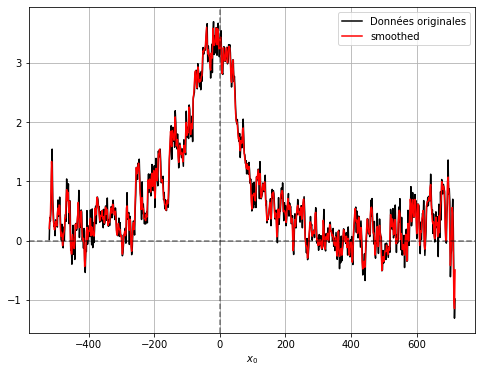

In [5]:
# il faut lisser sinom beaucoup d'extremum 

window_size = 2
y_smoothed = np.convolve(Y, np.ones(window_size)/window_size, mode='same')
plt.figure(figsize=(8, 6))

plt.plot(X, Y, color='black', label='Données originales')
plt.plot(X, y_smoothed, label=f'smoothed', color='red' , linewidth=1.5 )
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.xlabel('$x_0$')
plt.legend()
plt.grid(True)
plt.show()

2024-04-24


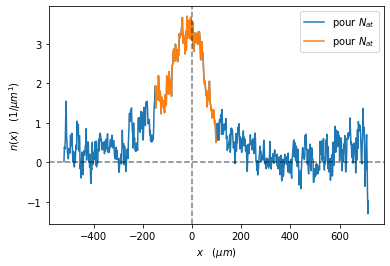

In [6]:
print(date_donnees)
if date_donnees == '2024-02-09': mask = (X > -200) & (X < 50)
elif date_donnees == '2024-02-29': 
    mask = (X > -220) & (X < 20)
    MASK = (X>0)*(X<150) 
    p0 =  117 # Estimation initiale pour x0
elif date_donnees == '2024-04-24': 
    mask = (X > -150) & (X < 100)
    MASK = (X>10)*(X<20) 
    p0 =  -14 # Estimation initiale pour x0
plt.plot ( X , Y , label = "pour $N_{at}$")
plt.plot ( X[mask] , Y[mask] , label = "pour $N_{at}$")
plt.xlabel(r"$x \quad (\mu m)$")  # Label de l'axe des X (avec notation LaTeX)
plt.ylabel(r"$n(x) \quad (1/\mu m^1)$")  # Label de l'axe des Y (avec notation LaTeX)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.legend()
plt.show()

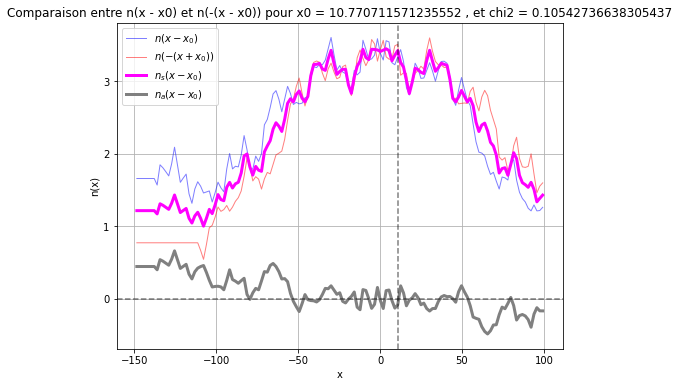

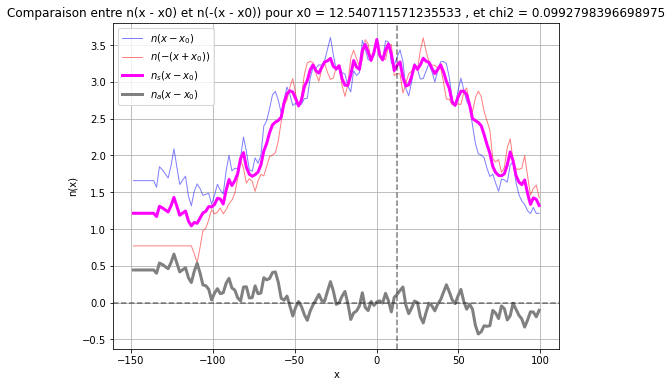

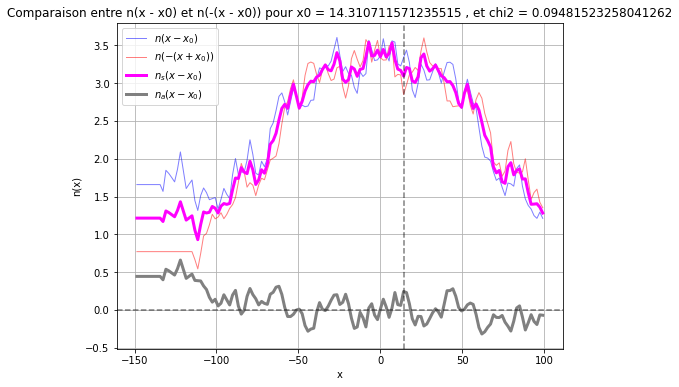

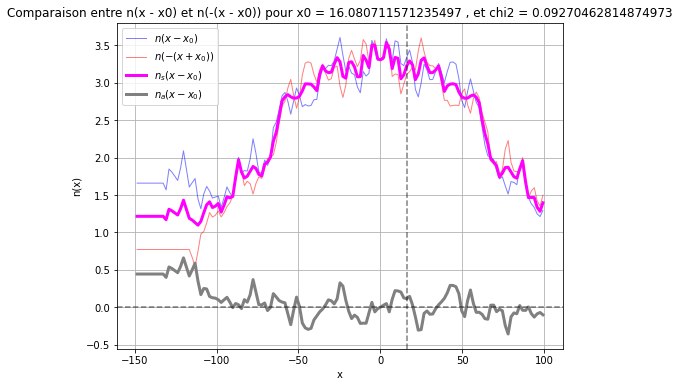

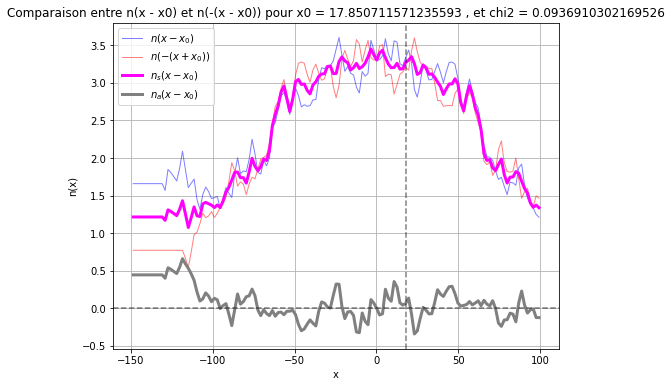

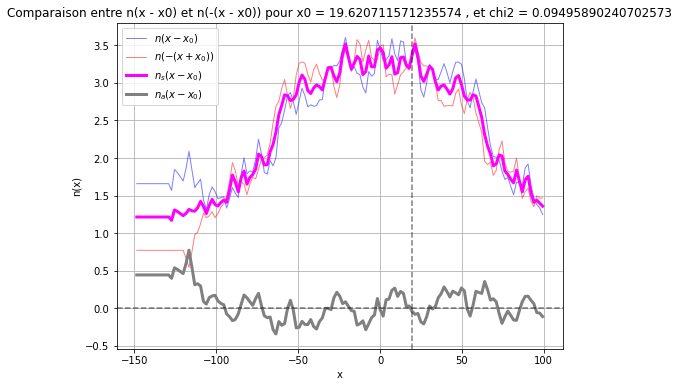

NameError: name 'x0' is not defined

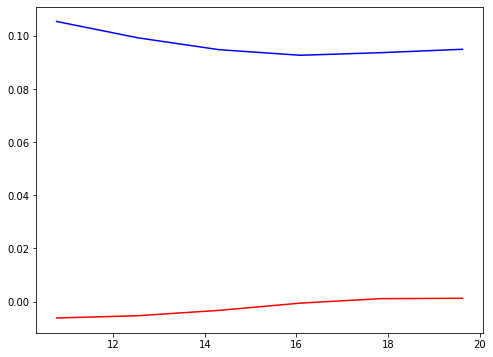

In [7]:
# Calculer la fonction 
#MASK = mask
#CHI2 = np.array([chi_squared_and_plot(np.flip(X[mask]), np.flip(Y[mask]), x0, sigma=None) for x0 in np.flip(X[MASK])])
CHI2 = np.array([chi_squared_and_plot(np.flip(X[mask]), np.flip(y_smoothed[mask]), x0, sigma=None) for x0 in np.flip(X[MASK])])
plt.figure(figsize=(8, 6))
plt.plot(np.flip(X[MASK]), CHI2, label=f'$\\chi^2$', color='blue')
plt.plot(np.flip(X[MASK]), np.gradient(CHI2), label=f'$d\\chi^2$', color='red')
plt.title(f'Comparaison entre n(x - x0) et n(-(x - x0)) pour x0 = {x0}')
#plt.axvline(x=x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
#plt.xlim([90 , 120 ])
#plt.ylim([-100, 200 ])
plt.xlabel('$x_0$')
plt.ylabel(f'$\\chi^2$')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Cercher min 

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

X0 , YChi2 = [] , []
plt.figure(figsize=(8, 6))
plt.title(f'Comparaison entre chi2 pour x')
# Fonction à minimiser (chi-carré en fonction de x0)
def objective_function(x0, x, y):
    chi = chi_squared_and_plot(x, y, x0)
    X0.append(x0)
    YChi2.append(chi)
    plt.plot( X0 , YChi2 ) 
    plt.xlabel('$x_0$')
    plt.ylabel(f'$\\chi^2$')
    plt.show()
    return chi


# Paramètres d'initialisation
#p0 =  117 # Estimation initiale pour x0
lower_bound = 0.5*p0  # Borne inférieure pour x0
upper_bound = 1.5*p0  # Borne supérieure pour x0

# Utilisation de scipy.optimize.minimize pour trouver le minimum de chi-carré
result = minimize(
    objective_function,  # Fonction objectif
    p0,  # Estimation initiale de x0
    args=(np.flip(X[mask]), np.flip(y_smoothed[mask])),  # Arguments supplémentaires (x_data, y_data)
    #args=(np.flip(X[mask]), np.flip(Y[mask])),  # Arguments supplémentaires (x_data, y_data)
    #bounds=[(lower_bound, upper_bound)],  # Bornes pour x0
    method='L-BFGS-B'  # Méthode de quasi-Newton avec bornes
)

# Résultat de l'optimisation
print(f"Optimisation terminée. x0 optimisé : {result.x[0]}, Chi-carré final : {result.fun}")


chi_squared_and_plot(np.flip(X), np.flip(y_smoothed), result.x[0])
chi_squared_and_plot(np.flip(X), np.flip(Y), result.x[0])

In [ ]:
# Fonction d'interpolation de n(x) (renvoie 0 si x est en dehors des bornes)
def n(x_val):
    if x_val < min(x):
        return y[0]  # Retourne 0 si x est hors des bornes
    elif x_val > max(x):
        return y[-1]

    from scipy.interpolate import CubicSpline

    # Créer l'interpolateur spline cubique
    spline = CubicSpline(x, y)

    # Générer des points à interpoler
    y_new = spline(x_val)
    return y_new#np.interp(x_val, x, y)  # Interpolation linéaire

x , y = np.flip(X), np.flip(y_smoothed)
#x , y = np.flip(X), np.flip(Y)

x0 = result.x[0]
n_x_minus_x0 = [n(xi-x0)for xi in x]

n_neg_x_minus_x0 = [n(-xi-x0)for xi in x]

n_neg_x_minus_x0 = [item if isinstance(item, np.float64) else item.item() for item in n_neg_x_minus_x0]
n_x_minus_x0 = [item if isinstance(item, np.float64) else item.item() for item in n_x_minus_x0]

n_s = (np.array(n_x_minus_x0) + np.array(n_neg_x_minus_x0))/2
n_a = (np.array(n_x_minus_x0) - np.array(n_neg_x_minus_x0))/2


diff = np.array(n_x_minus_x0) - np.array(n_neg_x_minus_x0)

# Calcul de chi²
sigma = None
if sigma is None:sigma = np.ones_like(y)  # Si sigma n'est pas spécifié, on prend une incertitude de 1

chi2 = np.sum((np.array(diff) ** 2) / (np.array(sigma) ** 2))
chi2 = norme(diff/2, 2)/norme(n_x_minus_x0 , 2)

x_vals = x

# Tracé des deux courbes
plt.figure(figsize=(8, 6))
#plt.plot(x_vals, n_x, label=r'$n(x)$', color='blue')
plt.plot(x_vals, n_x_minus_x0, label=r'$n^f \,(x)$', color='blue' ,  linewidth=1, alpha=0.5 )


#plt.plot(x_vals, n_neg_x_plus_x0, label=r'$n(-(x - x_0))$', color='red', linestyle='--')
plt.plot(x_vals, n_neg_x_minus_x0, label=r'$n^f \,(-x )$', color='red',  linewidth=1, alpha=0.5)
plt.plot(x_vals, n_s, label=r'$n_s^f(x) = \frac{n^f(x) + n^f(-x)}{2}$', color='magenta', linestyle='-' , linewidth=3 , alpha = 0.5 )
plt.plot(x_vals, n_a, label=r'$n_a^f(x) = \frac{n^f(x) - n^f(-x)}{2}$', color='orange', linestyle='-' , linewidth=3 , alpha = 0.5 ) 
#plt.scatter(X, Y, color='black', label=r'Données originales $n(x)$')
plt.title(
    f'$x_0 = {x0:.3f}~\mu m, \; \\chi^2 = 2 \\Vert n_a^f \\Vert^2_2 = {chi2:.3f}~(\mu m)^{-2}; \quad (d = {window_size:.3f}~\mu m)$'
)
plt.axvline(x=x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.xlabel('x')
plt.ylabel(r'$n , \quad n^f = x \mapsto \left \{x \mapsto H\left(\left(\frac{x}{d}\right)^2 - 1\right) \star n \right\}\, ( x -x_0 ) $ ')
plt.legend()
plt.grid(True)
plt.savefig('graphique_transparent.png', transparent=True)
plt.savefig('graphique_high_res.png', dpi=300) 
plt.show()


In [ ]:
colors = [
    #"#1f77b4",  # Bleu
    #"#ff7f0e",  # Orange
    #"#2ca02c",  # Vert
    #"#d62728",  # Rouge
    "#9467bd",  # Violet
    "#8c564b",  # Marron
    "#e377c2",  # Rose
    "#7f7f7f",  # Gris
    "#bcbd22",  # Jaune Olive
    "#17becf"   # Cyan
]

In [ ]:
# Tracé des deux courbes
print(x0)
plt.figure()
### Plot style
police = 12
plt.rcParams["figure.figsize"] = (5,3)

#plt.plot(x_vals, n_x, label=r'$n(x)$', color='blue')
#plt.plot(x_vals, n_x_minus_x0, label=r'$n^f \,(x)$', color='blue' ,  linewidth=1, alpha=0.5 )
#plt.plot(X+x0, Y, label=r'$n \,(x -x_0)$', color="#1f77b4" ,  linewidth=1.5, alpha=0.8 )
#plt.plot(X+x0, y_smoothed, label=r'$n^s \,(+x)$', color="#1f77b4" ,  linewidth=1.5, alpha=0.8 )
plt.plot(X, y_smoothed, label=r'$\tilde{n} \,(x)$', color="#1f77b4" ,  linewidth=1.5, alpha=0.8 )


#plt.plot(x_vals, n_neg_x_plus_x0, label=r'$n(-(x - x_0))$', color='red', linestyle='--')
#plt.plot(x_vals, n_neg_x_minus_x0, label=r'$n^f \,(-x )$', color='red',  linewidth=1, alpha=0.5)
#plt.plot(-X-x0, Y, label=r'$n \,(-x-x_0 )$', color="#d62728",  linewidth=1.5, alpha=0.8)
#plt.plot(-X-x0, y_smoothed, label=r'$n^s \,(-x)$', color="#d62728",  linewidth=1.5, alpha=0.8)
#plt.plot(-X-2*x0, y_smoothed, label=r'$\tilde{n} \,(2x_s-x)$', color="#d62728" ,  linewidth=1.5, alpha=0.8 )
#plt.plot(X-2*x0, y_smoothed, label=r'$\tilde{n} \,(2x_s-x)$', color="#d62728" ,  linewidth=1.5, alpha=0.8 )

#plt.plot(X+x0, y_smoothed, label=r'$n^f \,(x)$', color="#7f7f7f" ,  linewidth=1.5, alpha=1 )
#plt.plot(-X-x0, y_smoothed, label=r'$n^f \,(-x)$', color="#8c564b",  linewidth=1.5, alpha=1)
#plt.plot(x_vals, n_s, label=r'$n_s^f(x) = \frac{n^f(x) + n^f(-x)}{2}$', color='magenta', linestyle='-' , linewidth=3 , alpha = 0.5 )
#plt.plot(x_vals, n_a, label=r'$n_a^f(x) = \frac{n^f(x) - n^f(-x)}{2}$', color='orange', linestyle='-' , linewidth=3 , alpha = 0.5 ) 
#plt.scatter(X, Y, color='black', label=r'Données originales $n(x)$')
#plt.title(
#    f'$x_s = {x0:.3f}~\mu m, \; \\chi = \\Vert n_a^s \\Vert_2/\\Vert n^s \\Vert_2= {chi2:.3f}; \quad (d = {window_size:.0f}~\mu m)$',
#    fontsize=14, color='black'
#)
#plt.axvline(x=X[-1]+x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
#plt.axvline(x=-X[-1]-x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axvline(x=-x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.xlim([X[-1]+x0 , -X[-1]-x0])
plt.ylim([-0.5 , 3.7])
#plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.xlabel(r'$x\quad (\mu m)$', fontsize=police, color='black')#, fontweight='bold')
#plt.ylabel(r'$n^s ~\colon~ x \mapsto \left \{n \star \left(y \mapsto   H\left(\left(\frac{y}{d}\right)^2 - 1\right) \right) \right\}\, ( x -x_c ) ~~(1/\mu m )$ ' , fontsize=14, color='black' )
#plt.ylabel(r'$n^s = \left \{n \star \left(y \mapsto   H\left(\left(\frac{y}{d}\right)^2 - 1\right) \right) \right\} ~~(1/\mu m )$ ' , fontsize=14, color='black' )
plt.ylabel(r'$\tilde{n} \quad (\mu m^{-1} $) ' , fontsize=police, color='black' )

plt.grid(color='white', linestyle='-', linewidth=1)

# Appliquer un fond gris
#plt.gca().set_facecolor('lightgray')  # Fond gris pour le canevas


# Appliquer un fond gris clair au graphe
#plt.gca().set_facecolor('#f0f0f0')  # Fond gris très clair (hex pour personnalisation)
plt.gca().set_facecolor('#e8e8e8')  # Fond gris plus foncé

# Rendre le cadre invisible
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

#plt.gcf().set_facecolor('lightgray')  # Fond gris pour l'ensemble de la figure

# Ajouter une légende avec fond gris et bordure blanche
plt.legend(
    fontsize=police,
    facecolor='#e8e8e8',  # Fond gris pour la légende
    #edgecolor='#b0b0b0',       # Bordure blanche pour la légende
    bbox_to_anchor=(0.58, 1.0)  # Ajuster ici (x, y)
)
plt.grid(True)
plt.savefig('Figures/article_asymetrie_24-04-2024.pdf', bbox_inches='tight', dpi = 300)
plt.savefig('Figures/article_asymetrie_24-04-2024.svg', bbox_inches='tight', dpi = 300)
plt.show()

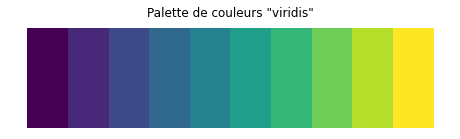

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Créer un tableau de couleurs pour la palette
colors = plt.cm.viridis(np.linspace(0, 1, 10))

# Tracer un carré pour chaque couleur de la palette
plt.figure(figsize=(8, 2))
for i, color in enumerate(colors):
    plt.fill_between([i, i+1], 0, 1, color=color)

# Ajouter un titre
plt.title('Palette de couleurs "viridis"')

# Enlever les axes
plt.axis('off')

# Afficher le graphique
plt.show()


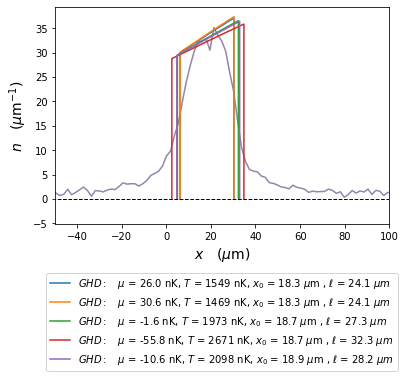

NameError: name 'Temps_exp' is not defined

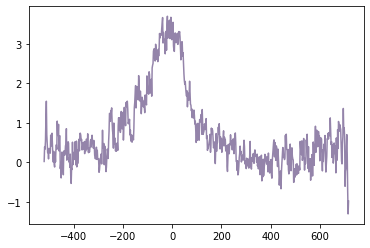

In [9]:
date = '2025-01-27'

Listes_param = [(date , 25.997209,  1549.169104,  18.3,    24.1) , (date , 30.636, 1469.009, 18.339, 24.087), (date, -1.553, 1972.513, 18.7, 27.34), (date , -55.833956,  2670.842663,  18.7,   32.28), (date,-10.560069,  2097.695575,  18.86,  28.165) ]

nom = "theta_edge_1.0_ih2"
X , Y , label = DONNEES[2]
plt.plot(X,Y , color=plt.cm.inferno(0.15) , alpha = 0.5)

for liste_param in Listes_param :
    date , mu , T , x0 , Taille = liste_param
    filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
    data =  np.load(filename) 
    label = f"$GHD : \\quad \\mu$ = {mu:.1f} nK, $T$ = {T:.0f} nK, $x_0$ = {x0:.1f} $\\mu$m , $\\ell$ = {Taille:.1f} $\\mu m$"
    plt.plot(data[0, :] * Taille , data[1, :] , label = label ) 
    

police = 14

plt.hlines(y = 0 , xmin= -100 , xmax = 100 , color ="black" , linestyle='--', linewidth=1)
plt.xlabel("$x\quad (\mu$m)", fontsize = police, color = "black")
plt.ylabel("$n\quad (\mu$m$^{-1}$)", fontsize = police, color = "black")
plt.xlim(-50,100)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)
plt.savefig("Figures/simul_deformation_1_compare_x0_Talle.pdf", bbox_inches='tight', dpi = 300)
plt.savefig("Figures/simul_deformation_1_compare_x0_Talle.svg", bbox_inches='tight', dpi = 300)
plt.show()

## 3O ms

X , Y , label = DONNEES[3]
plt.plot(X,Y , color=plt.cm.inferno(0.15) , alpha = 0.5)


for liste_param in Listes_param :
    date , mu , T , x0 , Taille = liste_param
    filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{Temps_exp:.3f}.npz"
    data =  np.load(filename) 
    label = f"$GHD : \\quad \\mu$ = {mu:.1f} nK, $T$ = {T:.0f} nK, $x_0$ = {x0:.1f} $\\mu$m , $\\ell$ = {Taille:.1f} $\\mu m$"
    plt.plot(data[0, :] * Taille , data[1, :] , label = label ) 
    


plt.hlines(y = 0 , xmin= -500 , xmax = 500 , color ="black" , linestyle='--', linewidth=1)
plt.xlabel("$x\quad (\mu$m)", fontsize = police, color = "black")
plt.ylabel("$n\quad (\mu$m$^{-1}$)", fontsize = police, color = "black")
plt.xlim(-400,400)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)
plt.savefig("Figures/simul_deformation_30_compare_x0_Talle.pdf", bbox_inches='tight', dpi = 300)
plt.savefig("Figures/simul_deformation_30_compare_x0_Talle.svg", bbox_inches='tight', dpi = 300)
plt.show()

## comparer Nat

NAT = [ 0 ] 

X0 , Y0 , label = DONNEES[2]
mask = (X0>-20)*(X0<60)
X , Y = np.flip(X0[mask]) ,Y0[mask] 
print ( len(X) , len(Y))
delta_x = np.array([X[i+1] - X[i] for i in range(len(X)-1)] + [X[len(X)-1] - X[len(X)-2]])
#print("nombre atome " , integrale(X,Y,  window_size = 3, poly_order = 2,  plt_flag = 0) , np.sum(Y*delta_x) )
Nat = integrale(X,Y)

X0 , Y0 , label = DONNEES[3]
mask = (X0>-400)*(X0<400)
X , Y = np.flip(X0[mask]) ,Y0[mask] 
print ( len(X) , len(Y))
delta_x = np.array([X[i+1] - X[i] for i in range(len(X)-1)] + [X[len(X)-1] - X[len(X)-2]])
#print("nombre atome " , integrale(X,Y,  window_size = 50, poly_order = 2,  plt_flag = 0) , np.sum(Y*delta_x) )

NAT.append((integrale(X,Y,  window_size = 50, poly_order = 2)-Nat)/Nat*100)
plt.plot([1,30], NAT  ,linestyle='--', marker='o',  color=plt.cm.inferno(0.15) , alpha = 0.5 , label = "donnée") 

for liste_param in Listes_param :
    NAT_t = [] 
    date , mu , T , x0 , Taille = liste_param
    label = f"$GHD : \\quad \\mu$ = {mu:.1f} nK, $T$ = {T:.0f} nK, $x_0$ = {x0:.1f} $\\mu$m , $\\ell$ = {Taille:.1f} $\\mu m$"
    print(label)
    triples = extract_triples(date, nom, round(mu,3), round(T,3), round(x0,3), round(Taille,3))
    liste_t = triples[list(triples.keys())[0]]
    for t in liste_t :
        
        filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
        data =  np.load(filename)
        
        X , Y = data[0, :] * Taille , data[1, :]
        delta_x = np.array([X[i+1] - X[i] for i in range(len(X)-1)] + [X[len(X)-1] - X[len(X)-2]])
        #print("nombre atome " , integrale(X,Y,  window_size = 3, poly_order = 2,  plt_flag = 0) , np.sum(Y*delta_x) )

        NAT_t.append((integrale(X,Y)-Nat)/Nat*100)

    plt.plot(liste_t , NAT_t ,linestyle='--', marker='o', label = label ) 



plt.hlines(y = 0 , xmin= -100 , xmax = 35 , color ="black" , linestyle='--', linewidth=1)
plt.xlabel("$t \\quad  (ms)$", fontsize = police, color = "black")
plt.ylabel("$\\frac{N - N_{exp , 1ms}}{N_{exp , 1ms}} $", fontsize = police, color = "black")
plt.xlim(-1,31)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)
plt.savefig("Figures/simul_deformation_Nat_compare_x0_Talle.pdf", bbox_inches='tight', dpi = 300)
plt.savefig("Figures/simul_deformation_Nat_compare_x0_Talle.svg", bbox_inches='tight', dpi = 300)
plt.show()

In [ ]:
#print(date_donnees)
date_donnees = '2024-04-24'
#date_donnees = '2025-01-23'
print(date_donnees)
DONNEES = f_DONNEES(date_donnees) 
X , Y , label = DONNEES[3]
date = date_donnees

In [17]:
#print("date :" , date)
date = '2025-01-26'
date ='2024-04-24'
date = '2025-01-27'

#parametre bord 

if date in ['2024-02-09' , '2024-02-09_1']  :
    mu_b = None
    T_b = 353#406.356#None
    x0 =None
    Taille = None
    Temps_deform = 18 
    
elif date in  ['2024-02-29','2024-02-29_1']  :
    mu_b = None
    T_b = "[930,940]"#981.816#981.813#None
    x0 = None
    Taille = None
    Temps_deform = 28 


elif date in  ['2025-01-27' , '2025-01-26' , '2024-04-24' , '2024-04-24_1', '2025-01-23'] :
    mu_b = 64.676#None
    T_b = None#559.421#558.942#None
    x0 = 18.339#None
    Taille = None

    Temps_deform = 18 

  

 

nom = "theta_edge_1.0_ih2"
# Extraction des triples possibles
triples_b = extract_triples(date, nom, mu_b, T_b, x0, Taille)
print("Triples key possibles:", triples_b.keys())

# Accéder à la première clé du dictionnaire
first_key_b = list(triples_b.keys())[-1]

# Décomposer la clé (qui est un tuple) en plusieurs variables
mu_b, T_b , x0_b , Taille_b = first_key_b

Triples key possibles: dict_keys([(64.676, 559.421, 18.339, 22.089), (64.676, 559.427, 18.339, 22.089), (64.676, 559.424, 18.339, 22.089)])


In [18]:
#Parametre expension

##

if date in ['2024-02-09' , '2024-02-09_1']  :
    mu = None
    T = 353#934.588#None#None
    x0 =0 #3.0##15.958#None
    Taille = None
    Temps_exp = 50



elif date in  ['2024-02-29','2024-02-29_1']  :
    mu = None
    T = 1350.008#None#None
    x0 =-3.18##15.958#None
    Taille = None
    Temps_exp = 50


elif date in  ['2025-01-26', '2024-04-24' , '2024-04-24_1', '2025-01-23'] :
    mu ="[30,31]"#None
    T = None#">1460"#559.421#1468.853#1630.575#None#None
    x0 = None#18.339#17.853##15.958#None
    Taille = None
    Temps_exp = 30

elif date in  ['2025-01-27'] :
    mu = None#25.997209#None #7.815#"[30,31]"#None
    T = 1549.169 #None#1549.169104#"[1469,1471]"#1972.513 #None#1389.540#">1460"#559.421#1468.853#1630.575#None#None
    x0 = 18.3#18.339#None#18.339#17.853##15.958#None
    Taille = 24.1#None
    Temps_exp = 30

#25.997209  1549.169104  18.3    24.1



# Extraction des triples possibles
triples = extract_triples(date, nom, mu, T, x0, Taille)
print("Triples key possibles:", triples.keys())

# Accéder à la première clé du dictionnaire
first_key = list(triples.keys())[0]

# Décomposer la clé (qui est un tuple) en plusieurs variables
mu, T, x0, Taille = first_key

Triples key possibles: dict_keys([(25.997, 1549.169, 18.3, 24.1)])


In [19]:
from platform import python_version
print('Version de Python:', python_version())

### Importations
import numpy as np
import scipy as sp
from scipy import linalg
import math
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import interpolate
from colour import Color
from tqdm import tqdm
from mpl_toolkits.mplot3d import axes3d  # Fonction pour la 3D
from matplotlib.collections import PolyCollection
from scipy.signal import savgol_filter
from scipy import special
from scipy import integrate

plt.style.use("ggplot")

### Paramètres pour les tracés (ATTENTION PYTHON N'ARRIVE PAS A COMPILER LATEX POUR LE MOMENT ???)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"],
})
plt.rcParams["figure.figsize"] = (6,3)
plt.rcParams["figure.figsize"] = (6,3)


Version de Python: 3.10.12


ModuleNotFoundError: No module named 'tqdm'

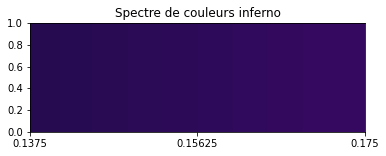

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Créer un vecteur de valeurs allant de 0 à 1 pour obtenir un spectre de couleurs

g , d = 0.1375 , 0.175

values = np.linspace(g , d ,  256)

# Créer un tableau de couleurs en utilisant la colormap 'inferno'
colors = plt.cm.inferno(values)

# Tracer un spectre de couleurs
plt.figure(figsize=(6, 2))
plt.imshow([colors], aspect='auto', extent=[0, 10, 0, 1])
#plt.axis('off')  # Désactiver les axes pour ne montrer que les couleurs
plt.xticks([0, 5, 10], [str(g) , str((g + d)/2) , str(d)])
plt.title("Spectre de couleurs inferno")
plt.show()


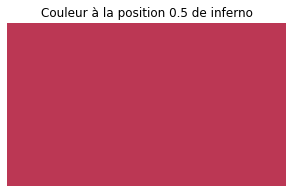

In [21]:
import matplotlib.pyplot as plt

# Couleur à la position 0.5 de la palette 'inferno'
color_at_05 = plt.cm.inferno(0.5)

# Tracer un échantillon de couleur
plt.imshow([[color_at_05]], aspect='auto')
plt.title("Couleur à la position 0.5 de inferno")
plt.axis('off')
plt.show()


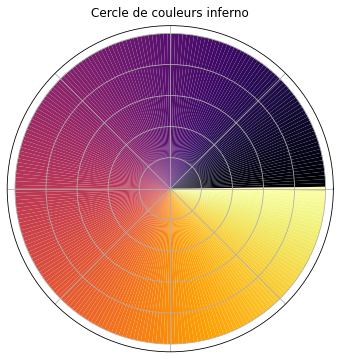

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Créer un vecteur de valeurs allant de 0 à 1 pour obtenir un spectre de couleurs
g, d = 0, 1
values = np.linspace(g, d, 256)

# Créer un tableau de couleurs en utilisant la colormap 'inferno'
colors = plt.cm.inferno(values)

# Créer des coordonnées polaires pour le cercle
theta = np.linspace(0, 2 * np.pi, 256)
r = np.ones_like(theta)  # Rayon constant pour un cercle parfait

# Tracer le cercle avec les couleurs de la colormap
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))

# Créer un secteur coloré
ax.bar(theta, r, width=2 * np.pi / 256, color=colors, bottom=0)

# Retirer les axes (ils ne sont pas nécessaires pour ce graphique)
ax.set_yticklabels([])  # Supprimer les labels des rayons
ax.set_xticklabels([])  # Supprimer les labels des angles

# Ajouter un titre
plt.title("Cercle de couleurs inferno", va='bottom')

plt.show()


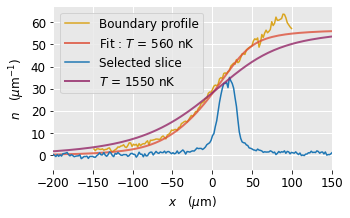

In [23]:
X , Y , label = DONNEES[1]




### Plot style
police = 12
plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams["figure.figsize"] = (5,3)

### Plot
plt.figure()
plt.plot(X[mask], Y[mask], color = "goldenrod", label = "Boundary profile" )

nom1 = "theta_edge_1.0_ih1"
data_GHD = np.load(f"{date}/density_expansion_nu_{nom1}_{mu_b:.3f}_{T_b:.3f}_{'veff_bord'}.npz") 
plt.plot(data_GHD[0, :] * Temps_deform, data_GHD[1, :], color=plt.cm.inferno(0.6), linewidth=2, alpha=0.8,
         label=f"Fit : $T$ = {round(T_b, -1):.0f} nK")

X , Y , label = DONNEES[2]
mask = (X < 100*Temps_deform)*(X>-100*Temps_deform)
#ax1.plot(X[mask], Y[mask], color='#1f77b4' ,label=f"donnés du "+ date_donnees + ' : ' + label )
plt.plot(X[mask], Y[mask], color='#1f77b4' ,label= "Selected slice" )

nom2 = "theta_edge_1.0_ih2"
data_GHD2 = np.load(f"{date}/density_expansion_nu_{nom1}_{mu:.3f}_{T:.3f}_{'veff_bord'}.npz")
plt.plot(data_GHD2[0, :] * Temps_deform, data_GHD2[1, :], color=plt.cm.inferno(0.4), linewidth=2, alpha=0.8,
         label=f"$T$ = {round(T, -1):.0f} nK")

# Ajouter une grille blanche
plt.grid(color='white', linestyle='-', linewidth=1)

# Appliquer un fond gris
#plt.gca().set_facecolor('lightgray')  # Fond gris pour le canevas


# Appliquer un fond gris clair au graphe
#plt.gca().set_facecolor('#f0f0f0')  # Fond gris très clair (hex pour personnalisation)
plt.gca().set_facecolor('#e8e8e8')  # Fond gris plus foncé

# Rendre le cadre invisible
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

#plt.gcf().set_facecolor('lightgray')  # Fond gris pour l'ensemble de la figure

# Ajouter une légende avec fond gris et bordure blanche
plt.legend(
    loc='upper left',
    fontsize=police,
    facecolor='#e8e8e8',  # Fond gris pour la légende
    #edgecolor='black',       # Bordure blanche pour la légende
    bbox_to_anchor=(0.005, 1)  # Ajuster ici (x, y)
)

plt.xlabel("$x\quad (\mu$m)", fontsize = police, color = "black")
plt.ylabel("$n\quad (\mu$m$^{-1}$)", fontsize = police, color = "black")
plt.xticks(fontsize = police, color = "black")
plt.yticks(fontsize = police, color = "black")
#plt.legend(fontsize = police)
plt.xlim(-200,150)
#plt.savefig("Figures/article_simul_deformation_1_24-04-2024-mu-T-x0=18.3.pdf", bbox_inches='tight', dpi = 300)
#plt.savefig("Figures/article_simul_deformation_1_24-04-2024-mu-T-x0=18.3.svg", bbox_inches='tight', dpi = 300)
#plt.savefig("Figures/article_simul_deformation_1_24-04-2024-mu-T-Taille=29.pdf", bbox_inches='tight', dpi = 300)
#plt.savefig("Figures/article_simul_deformation_1_24-04-2024-mu-T-Taille=29.svg", bbox_inches='tight', dpi = 300)
plt.savefig("Figures/article_simul_deformation_1_24-04-2024-T-x0.pdf", bbox_inches='tight', dpi = 300)
plt.savefig("Figures/article_simul_deformation_1_24-04-2024-T-x0.svg", bbox_inches='tight', dpi = 300)
plt.show()


theta_edge_1.0_ih2
filename = 2025-01-27/rho_theta_edge_1.0_discr_ih2_25.997_1549.169_18.300.npz
filename = 2025-01-27/rho_theta_edge_1.0_discr_moy_ih2_25.997_1549.169_18.300_24.100.npz


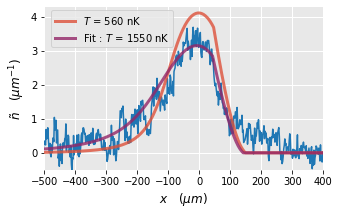

In [24]:
fig, ax1 = plt.subplots()
X , Y , label = DONNEES[-1]
mask = X < 20*Temps_exp
#ax1.plot(X[mask], Y[mask], color = "#1f77b4" , label=f"donnés du "+ date_donnees + ' : ' + label )
ax1.plot(X[mask], Y[mask], color = "#1f77b4" )#, label="Data" )
index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore

theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
label = f"$\\Pi_{{ \\{{x_0 , \\ell\\}} }} /\\tau : \\quad \\mu$ = {mu_b:.3f} nK, $T$ = {T_b:.3f} nK, $x_0$ = {x0_b:.3f} $\\mu$m , $\\ell$ = {Taille_b:.3f} $\\mu$"

ax1.set_xlabel("$x \quad (\mu m)$", fontsize=police)
ax1.set_ylabel(r"$\tilde{n} \quad (\mu m^{-1})$", fontsize=police)
ax1.set_title("", fontsize=16)

#plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
#plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

nom = "theta_edge_1.0_ih2"
filename = f"{date}/density_expansion_nu_{nom}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}_{Taille_b:.3f}_{Temps_exp:.3f}.npz"
data_s = np.load(filename) 

# Créer un nouvel intervalle allant de 0 à 400
x_new = np.linspace(max(data_s[0, :] * Taille_b) , 400, 100)  # 100 points entre 0 et 400
y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux

# Concaténer avec tes données existantes
x_combined = np.concatenate([data_s[0, :] * Taille_b, x_new])
y_combined = np.concatenate([data_s[1, :], y_new])

ax1.plot(x_combined, 
         y_combined, 
         linewidth=3, 
         color=plt.cm.inferno(0.6), 
         alpha=0.8, 
         label=f"$T$ = {round(T_b, -1):.0f} nK"
            )

filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{Temps_exp:.3f}.npz"
data_s = np.load(filename) 

# Créer un nouvel intervalle allant de 0 à 400
x_new = np.linspace(max(data_s[0, :] * Taille) , 400, 100)  # 100 points entre 0 et 400
y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux

# Concaténer avec tes données existantes
x_combined = np.concatenate([data_s[0, :] * Taille, x_new])
y_combined = np.concatenate([data_s[1, :], y_new])

      
ax1.plot(
        x_combined,  # X : données des abscisses, multipliées par Taille
        y_combined,  # Y : données des ordonnées
        linewidth=3,  # Épaisseur de la ligne
        color=plt.cm.inferno(0.4),  # Couleur de la ligne (code hexadécimal)
        alpha=0.8,  # Transparence de la ligne (0 = transparent, 1 = opaque)
        label=f"Fit : $T$ = {round(T, -1):.0f} nK"
        )

    
index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
print(nom)
filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
print ( 'filename =' ,filename )
rho_theta_star_discr = np.load(filename)
filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}.npz"
print ( 'filename =' ,filename )
rho_theta_discr_moy = np.load(filename)
theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
theta0 =  0 
#ax1.plot(theta_discr*t, rho_theta_star_discr/t*Taille, label=f"$\\rho^\\star/\\tau*\\ell : \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0$ = {x0:.3f} $\\mu$m")
#ax1.plot(theta_discr*t, rho_theta_discr_moy/t*Taille, label=f"$\\Pi^\\star/\\tau*\\ell : \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0$ = {x0:.3f} $\\mu$m , $\\ell$ = {Taille:.3f} $\\mu$m")
ax1.set_xlim(-10*Temps_exp, 10*Temps_exp)  
plt.ylim([-0.5 , 4.3 ])
plt.xlim([-500, 400 ])
plt.grid(color='white', linestyle='-', linewidth=1)
plt.gca().set_facecolor('#e8e8e8')  # Fond gris plus foncé
# Rendre le cadre invisible
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.grid(True)
# Personnalisation de la légende
ax1.legend(
    #handles=legend_elements,
    #loc='upper left',             # Position de la légende
    loc='upper left',
    #bbox_to_anchor=(0.3, 1),    # Ajuste la position avec un ancrage spécifique
    #loc='best', 
    bbox_to_anchor=(0.005, 1.01),
    #fancybox=False,                  # Ajouter une bordure arrondie
    #shadow=False,                    # Ajouter une ombre
    #ncol=1,                         # Nombre de colonnes pour les entrées de la légende
    fontsize=10,#police,                    # Taille de la police
    #framealpha=0.5,                 # Transparence du fond de la légende (0: transparent, 1: opaque)
    facecolor='#e8e8e8',                  # Couleur de fond de la légende
    #edgecolor='black',              # Couleur du bord de la légende
    #title='Légende de l\'expérience', # Titre de la légende
    #title_fontsize='large',         # Taille de la police du titre
    #labelspacing=0.1,               # Espacement entre les labels de la légende
    #handlelength=0.5,               # Longueur des poignées des items de la légende
    #handleheight=1.5,               # Hauteur des poignées des items de la légende
    #columnspacing=0,               # Espacement entre les colonnes
    #alignment = 'right',
)

plt.savefig("Figures/article_simul_expansion_1_24-04-2024-T-x0.pdf", bbox_inches='tight', dpi = 300)
plt.savefig("Figures/article_simul_expansion_1_24-04-2024-T-x0.svg", bbox_inches='tight', dpi = 300)
plt.show()

2025-01-27/theta_discr_exp_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz
nombre atome GDH  840.7550174646001 833.9556557675195
nombre atome Pi  813.0900506540682 806.297657619168
theta_edge_1.0_ih2
filename = 2025-01-27/rho_bon_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz
filename = 2025-01-27/rho_theta_edge_1.0_discr_moy_ih2_64.676_559.424_18.339_22.089.npz
filename = 2025-01-27/theta_discr_exp_2_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz
600 600
600


/tmp/ipykernel_424218/2037850559.py:563: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_value, _ = quad(f, np.min(x), np.max(x), epsabs=1e-8, epsrel=1e-8)


nombre atome rho  813.6602230915545


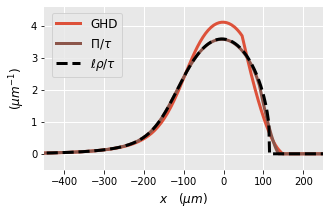

In [26]:
theta_discr_exp = np.load(f"{date}/theta_discr_exp_{nom2}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}_{Taille_b:.3f}_{0:.3f}.npz")
print(f"{date}/theta_discr_exp_{nom2}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}_{Taille_b:.3f}_{0:.3f}.npz")
fig, ax1 = plt.subplots()
X , Y , label = DONNEES[-1]
mask = X < 20*Temps_exp



nom = "theta_edge_1.0_ih2"
for t in [Temps_exp ]:
    
    filename = f"{date}/density_expansion_nu_{nom}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}_{Taille_b:.3f}_{t:.3f}.npz"
    data_s = np.load(filename) 
    label = f"$n_{{GHD}}$ : $\\mu$ = {mu_b:.3f} nK, $T$ = {T_b:.3f} nK, $x_0$ = {x0_b:.3f} $\\mu m$, $\\ell$ = {Taille_b:.3f} $\\mu m$"
    label = label.replace("\t", " ")  # Remplacer les tabulations par des espaces

    
    label = r"GHD"
    # Créer un nouvel intervalle allant de 0 à 400
    x_new = np.linspace(max(data_s[0, :] * Taille_b) , 400, 100)  # 100 points entre 0 et 400
    y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux

    # Concaténer avec tes données existantes
    x_combined = np.concatenate([data_s[0, :] * Taille_b, x_new])
    y_combined = np.concatenate([data_s[1, :], y_new])
        
    ax1.plot(x_combined, y_combined, linewidth=3, color=plt.cm.inferno(0.6), alpha=1,
         label=label)
    delta_x = np.array([x_combined[i+1] - x_combined[i] for i in range(len(x_combined)-1)] + [x_combined[len(x_combined)-1] - x_combined[len(x_combined)-2]])
    print("nombre atome GDH " , integrale(x_combined, y_combined) ,  np.sum(y_combined*delta_x))



#ax1.plot(X[mask], Y[mask], label=f"donnés du "+ date_donnees + ' : ' + label )
index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore


label = r"$\Pi/\tau$"
x_new = np.linspace(max(theta_discr_exp*Temps_exp +x0_b) , 400, 100)  # 100 points entre 0 et 400
y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux
Pi_0 = np.load(f"{date}/Pi_{nom2}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}_{Taille_b:.3f}_{0:.3f}.npz") * Taille_b
# Concaténer avec tes données existantes
x_combined = np.concatenate([theta_discr_exp*Temps_exp +x0_b, x_new])
y_combined = np.concatenate([Pi_0/Temps_exp, y_new])
ax1.plot(x_combined,  y_combined, linewidth=3, color="#8c564b",alpha=1, 
         label=label)

Pi_2 = np.load(f"{date}/Pi_2_{nom2}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}_{Taille_b:.3f}_{0:.3f}.npz")['arr_0']

#x_combined = np.concatenate([theta_discr_exp*Temps_exp +x0_b, x_new])
#y_combined = np.concatenate([Pi_2/Temps_exp, y_new])
#ax1.plot(theta_discr_exp_2*Temps_exp +x0_b,  Pi_2/Temps_exp , linewidth=4, color="#8c564b",alpha=0.8, label=' 2 ' + label)
delta_x = np.array([x_combined[i+1] - x_combined[i] for i in range(len(x_combined)-1)] + [x_combined[len(x_combined)-1] - x_combined[len(x_combined)-2]])
print("nombre atome Pi " , integrale(x_combined,y_combined) , np.sum(y_combined*delta_x) ) 

theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
#ax1.set(xlabel="$x \quad \mu m  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu_b:.3f} $nK$ , $T =$ {T_b:.3f} $nK$ , $x_0 =$ {x0_b:.3f} $\mu m$,  $\\ell =$ {Taille_b:.3f} $\mu m$")
ax1.set_xlabel("$x \quad (\mu m)$", fontsize=police)
ax1.set_ylabel(r"$(\mu m^{-1})$", fontsize=police)
#ax1.set_title(f" $\\mu = $ {mu_b:.1f} $nK$ , $T =$ {T_b:.0f} $nK$ , $x_0 =$ {x0_b:.1f} $\mu m$,  $\\ell =$ {Taille_b:.1f} $\mu m$", fontsize=16)
print(nom)
index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}.npz"
filename = f"{date}/rho_bon_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}.npz"
print ( 'filename =' ,filename )
rho_theta_star_discr = np.load(filename)['arr_0']
#print(rho_theta_star_discr.files)
filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}_{Taille_b:.3f}.npz"
print ( 'filename =' ,filename )
rho_theta_discr_moy = np.load(filename)
filename = f"{date}/theta_discr_exp_2_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}.npz"
filename = '2025-01-27/theta_discr_exp_2_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz' 
print ( 'filename =' ,filename )
theta_discr_exp_2 = np.load(filename)['arr_0']

print(len(theta_discr_exp_2), len(Pi_2))
label = r"$\ell\rho/\tau$" 



#theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
theta0 =  x0_b/Temps_exp

print(len(theta_discr_exp_2) )#,theta_discr_exp_2 )
ax1.plot((theta_discr_exp_2+theta0)*Temps_exp, 
         rho_theta_star_discr/Temps_exp*Taille_b , 
         linewidth=3 , 
         linestyle='--',
         alpha=1,
         color = "black",#"#bcbd22", 
         label=label)
print("nombre atome rho " , integrale((theta_discr_exp_2+theta0)*Temps_exp,rho_theta_star_discr/Temps_exp*Taille_b)) 


plt.ylim([-0.5 , 4.6 ])
plt.xlim([-450, 250 ])    
plt.grid(True)
#plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
#plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
# Personnalisation de la légende
ax1.legend(
    #loc='upper left',             # Position de la légende
    loc='upper left',
    #bbox_to_anchor=(0.3, 1),    # Ajuste la position avec un ancrage spécifique
    #loc='best', 
    bbox_to_anchor=(0.005, 1),
    #fancybox=False,                  # Ajouter une bordure arrondie
    #shadow=False,                    # Ajouter une ombre
    #ncol=1,                         # Nombre de colonnes pour les entrées de la légende
    fontsize=police,                    # Taille de la police
    #framealpha=0.5,                 # Transparence du fond de la légende (0: transparent, 1: opaque)
    facecolor='#e8e8e8',                  # Couleur de fond de la légende
    #edgecolor='black',              # Couleur du bord de la légende
    #title='Légende de l\'expérience', # Titre de la légende
    #title_fontsize='large',         # Taille de la police du titre
    #labelspacing=0.1,               # Espacement entre les labels de la légende
    #handlelength=0.5,               # Longueur des poignées des items de la légende
    #handleheight=1.5,               # Hauteur des poignées des items de la légende
    #columnspacing=0,               # Espacement entre les colonnes
    #alignment = 'right',
)
plt.grid(color='white', linestyle='-', linewidth=1)
# Rendre le cadre invisible
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Appliquer un fond gris
#plt.gca().set_facecolor('lightgray')  # Fond gris pour le canevas


# Appliquer un fond gris clair au graphe
#plt.gca().set_facecolor('#f0f0f0')  # Fond gris très clair (hex pour personnalisation)
plt.gca().set_facecolor('#e8e8e8')  # Fond gris plus foncé
plt.savefig('Figures/article_distribution_24-04-2024.pdf', bbox_inches='tight', dpi = 300)
plt.savefig('Figures/article_distribution_24-04-2024.svg', bbox_inches='tight', dpi = 300)
plt.show()



In [76]:
27/840

0.03214285714285714

$n_{\mathrm{GHD}}$ : $\mu$ = $64.7 \, \mathrm{nK}$
             $T$ = $559 \, \mathrm{nK}$
           $x_0$ = $18.3 \, \mu \mathrm{m}$
          $\ell$ = $22.1 \, \mu \mathrm{m}$
nombre atome GDH  840.764562961118
filename = 2025-01-27/rho_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz
filename = 2025-01-27/rho_theta_edge_1.0_discr_moy_ih2_64.676_559.424_18.339_22.089.npz
$\Pi_{ \{x_0 , \ell\} } /\tau$ : $\mu$ = $64.7 \, \mathrm{nK}$
             $T$ = $559 \, \mathrm{nK}$
           $x_0$ = $18.3 \, \mu \mathrm{m}$
          $\ell$ = $22.1 \, \mu \mathrm{m}$
t : 30
nombre atome Pi  21739.268608345614
$\rho ( x_0 , (\cdot+x_0)/\tau ) /\tau*\ell$ = $64.7 \, \mathrm{nK}$
             $T$ = $559 \, \mathrm{nK}$
           $x_0$ = $18.3 \, \mu \mathrm{m}$
          $\ell$ = $22.1 \, \mu \mathrm{m}$


/tmp/ipykernel_2722518/2037850559.py:563: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_value, _ = quad(f, np.min(x), np.max(x), epsabs=1e-8, epsrel=1e-8)


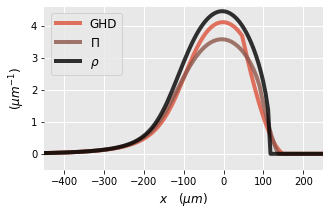

In [77]:
theta_discr_exp = np.load(f"{date}/theta_discr_exp_{nom2}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}_{Taille_b:.3f}_{0:.3f}.npz")

fig, ax1 = plt.subplots()
X , Y , label = DONNEES[-1]
mask = X < 20*Temps_exp
#ax1.plot(X[mask], Y[mask], label=f"donnés du "+ date_donnees + ' : ' + label )
index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore

theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
#ax1.set(xlabel="$x \quad \mu m  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu_b:.3f} $nK$ , $T =$ {T_b:.3f} $nK$ , $x_0 =$ {x0_b:.3f} $\mu m$,  $\\ell =$ {Taille_b:.3f} $\mu m$")
ax1.set_xlabel("$x \quad (\mu m)$", fontsize=police)
ax1.set_ylabel(r"$(\mu m^{-1})$", fontsize=police)
#ax1.set_title(f" $\\mu = $ {mu_b:.1f} $nK$ , $T =$ {T_b:.0f} $nK$ , $x_0 =$ {x0_b:.1f} $\mu m$,  $\\ell =$ {Taille_b:.1f} $\mu m$", fontsize=16)



#ax1.plot((theta_discr+theta0)*t, rho_theta_discr_moy/t*Taille_b, linewidth=4, color="#8c564b", 
         #label=label)


nom = "theta_edge_1.0_ih2"
for t in [Temps_exp ]:
    
    filename = f"{date}/density_expansion_nu_{nom}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}_{Taille_b:.3f}_{t:.3f}.npz"
    data_s = np.load(filename) 
    label = f"$n_{{GHD}}$ : $\\mu$ = {mu_b:.3f} nK, $T$ = {T_b:.3f} nK, $x_0$ = {x0_b:.3f} $\\mu m$, $\\ell$ = {Taille_b:.3f} $\\mu m$"
    label = label.replace("\t", " ")  # Remplacer les tabulations par des espaces

    # Dictionnaire avec les informations à afficher
    data = {
        r"$n_{\mathrm{GHD}}$ : $\mu$": f"${mu_b:.1f} \, \mathrm{{nK}}$",
        r"$T$": f"${T_b:.0f} \, \mathrm{{nK}}$",
        r"$x_0$": f"${x0_b:.1f} \, \mu \mathrm{{m}}$",
        r"$\ell$": f"${Taille_b:.1f} \, \mu \mathrm{{m}}$"
    }
    
    # Construction de chaque ligne avec une boucle
    lines = []
    # Définir la largeur de la clé et de la valeur
    key_width = 15 #max(len(key) for key in data.keys())  # Largeur maximale pour les clés
    value_width = 15#max(len(value) for value in data.values())  # Largeur maximale pour les valeurs
    
    for key, value in data.items():
        # On aligne les clés à gauche et les valeurs à droite avec un espace autour du signe égal
        line = f"{key:>{key_width}} = {value:<{value_width}}"
        lines.append(line)
    
    # Joindre les lignes avec des sauts de ligne
    label = "\n ".join(lines)
    
    print(label)
    label = r"GHD"
    # Créer un nouvel intervalle allant de 0 à 400
    x_new = np.linspace(max(data_s[0, :] * Taille_b) , 400, 100)  # 100 points entre 0 et 400
    y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux

    # Concaténer avec tes données existantes
    x_combined = np.concatenate([data_s[0, :] * Taille_b, x_new])
    y_combined = np.concatenate([data_s[1, :], y_new])
        
    ax1.plot(x_combined, y_combined, linewidth=4, color=plt.cm.inferno(0.6), alpha=0.8,
         label=label)

    print("nombre atome GDH " , integrale(data_s[0, :]*Taille_b, data_s[1, :]))

index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}.npz"
print ( 'filename =' ,filename )
rho_theta_star_discr = np.load(filename)
filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}_{Taille_b:.3f}.npz"
print ( 'filename =' ,filename )
rho_theta_discr_moy = np.load(filename)

#filename = "2025-01-23/Pi_theta_edge_1.0_ih2_64.676_559.421_18.339_22.089_0.000.npz"#f"{date}/Pi_{nom}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}_{Taille_b:.3f}_{0:.3f}.npz"

Pi_0 = np.load(f"{date}/Pi_{nom2}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}_{Taille_b:.3f}_{0:.3f}.npz") * Taille_b

label = r"$\Pi$"
x_new = np.linspace(max(theta_discr_exp*Temps_exp +x0_b) , 400, 100)  # 100 points entre 0 et 400
y_new = np.zeros_like(x_new)  # Remplir les valeurs de y avec des zéros ou une fonction que tu veux

# Concaténer avec tes données existantes
x_combined = np.concatenate([theta_discr_exp*Temps_exp +x0_b, x_new])
y_combined = np.concatenate([Pi_0/Temps_exp, y_new])
ax1.plot(x_combined,  y_combined, linewidth=4, color="#8c564b",alpha=0.8, 
         label=label)

theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
theta0 =  x0_b/Temps_exp

label = r"$\rho$"    
ax1.plot((theta_discr+theta0)*t, 
         rho_theta_star_discr/t*Taille_b , 
         linewidth=4 , 
         linestyle='-',
         alpha=0.8,
         color = "black",#"#bcbd22", 
         label=label)

#######################################
label = f"$\\Pi_{{ \\{{x_0 , \\ell\\}} }} /\\tau : \\quad \\mu$ = {mu_b:.3f} nK, $T$ = {T_b:.3f} nK, $x_0$ = {x0_b:.3f} $\\mu$m , $\\ell$ = {Taille_b:.3f} $\\mu$"
# Dictionnaire avec les informations à afficher
data = {
    r"$\Pi_{ \{x_0 , \ell\} } /\tau$ : $\mu$": f"${mu_b:.1f} \, \mathrm{{nK}}$",
    r"$T$": f"${T_b:.0f} \, \mathrm{{nK}}$",
    r"$x_0$": f"${x0_b:.1f} \, \mu \mathrm{{m}}$",
    r"$\ell$": f"${Taille_b:.1f} \, \mu \mathrm{{m}}$"
}

# Construction de chaque ligne avec une boucle
lines = []
# Définir la largeur de la clé et de la valeur
key_width = 15 #max(len(key) for key in data.keys())  # Largeur maximale pour les clés
value_width = 15#max(len(value) for value in data.values())  # Largeur maximale pour les valeurs

for key, value in data.items():
    # On aligne les clés à gauche et les valeurs à droite avec un espace autour du signe égal
    line = f"{key:>{key_width}} = {value:<{value_width}}"
    lines.append(line)

# Joindre les lignes avec des sauts de ligne
label = "\n ".join(lines)

print(label)
print("t :" , t )
#######################################



   


print("nombre atome Pi " , integrale((theta_discr+theta0)*t, rho_theta_discr_moy/t*Taille_b)) 

#######################################
# Dictionnaire avec les informations à afficher
data = {
    r"$\rho ( x_0 , (\cdot+x_0)/\tau ) /\tau*\ell$": f"${mu_b:.1f} \, \mathrm{{nK}}$",
    r"$T$": f"${T_b:.0f} \, \mathrm{{nK}}$",
    r"$x_0$": f"${x0_b:.1f} \, \mu \mathrm{{m}}$",
    r"$\ell$": f"${Taille_b:.1f} \, \mu \mathrm{{m}}$"
}

# Construction de chaque ligne avec une boucle
lines = []
# Définir la largeur de la clé et de la valeur
key_width = 15 #max(len(key) for key in data.keys())  # Largeur maximale pour les clés
value_width = 15#max(len(value) for value in data.values())  # Largeur maximale pour les valeurs

for key, value in data.items():
    # On aligne les clés à gauche et les valeurs à droite avec un espace autour du signe égal
    line = f"{key:>{key_width}} = {value:<{value_width}}"
    lines.append(line)

# Joindre les lignes avec des sauts de ligne
label = "\n ".join(lines)

print(label)

#######################################

plt.ylim([-0.5 , 4.6 ])
plt.xlim([-450, 250 ])    
plt.grid(True)
#plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
#plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
# Personnalisation de la légende
ax1.legend(
    #loc='upper left',             # Position de la légende
    loc='upper right',
    #bbox_to_anchor=(0.3, 1),    # Ajuste la position avec un ancrage spécifique
    #loc='best', 
    bbox_to_anchor=(0.3, 1),
    #fancybox=False,                  # Ajouter une bordure arrondie
    #shadow=False,                    # Ajouter une ombre
    #ncol=1,                         # Nombre de colonnes pour les entrées de la légende
    fontsize=police,                    # Taille de la police
    #framealpha=0.5,                 # Transparence du fond de la légende (0: transparent, 1: opaque)
    facecolor='#e8e8e8',                  # Couleur de fond de la légende
    #edgecolor='black',              # Couleur du bord de la légende
    #title='Légende de l\'expérience', # Titre de la légende
    #title_fontsize='large',         # Taille de la police du titre
    #labelspacing=0.1,               # Espacement entre les labels de la légende
    #handlelength=0.5,               # Longueur des poignées des items de la légende
    #handleheight=1.5,               # Hauteur des poignées des items de la légende
    #columnspacing=0,               # Espacement entre les colonnes
    #alignment = 'right',
)
plt.grid(color='white', linestyle='-', linewidth=1)
# Rendre le cadre invisible
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Appliquer un fond gris
#plt.gca().set_facecolor('lightgray')  # Fond gris pour le canevas


# Appliquer un fond gris clair au graphe
#plt.gca().set_facecolor('#f0f0f0')  # Fond gris très clair (hex pour personnalisation)
plt.gca().set_facecolor('#e8e8e8')  # Fond gris plus foncé
plt.savefig('Figures/article_distribution_24-04-2024.pdf', bbox_inches='tight', dpi = 300)
plt.savefig('Figures/article_distribution_24-04-2024.svg', bbox_inches='tight', dpi = 300)
plt.show()

$n_{\mathrm{GHD}}$ : $\mu$ = $64.7 \, \mathrm{nK}$
             $T$ = $559 \, \mathrm{nK}$
           $x_0$ = $18.3 \, \mu \mathrm{m}$
          $\ell$ = $22.1 \, \mu \mathrm{m}$


NameError: name 'legend_elements' is not defined

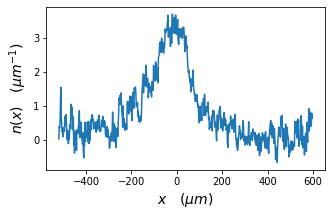

In [78]:
fig, ax1 = plt.subplots()
X , Y , label = DONNEES[-1]
mask = X < 20*Temps_exp
#ax1.plot(X[mask], Y[mask], color = "#1f77b4" , label=f"donnés du "+ date_donnees + ' : ' + label )
ax1.plot(X[mask], Y[mask], color = "#1f77b4" , label=label )
index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore

theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
ax1.set(xlabel="$x \quad \mu m  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x0:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")
ax1.set(xlabel="$x \quad \mu m  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" ")
ax1.set_xlabel("$x \quad (\mu m)$", fontsize=14)
ax1.set_ylabel("$n(x) \quad (\mu m^{-1})$", fontsize=14)
ax1.set_title("", fontsize=16)

#plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
#plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

nom = "theta_edge_1.0_ih2"
for t in [Temps_exp ]:

    filename = f"{date}/density_expansion_nu_{nom}_{mu_b:.3f}_{T_b:.3f}_{x0_b:.3f}_{Taille_b:.3f}_{t:.3f}.npz"
    data_s = np.load(filename) 
    #ligne_1 = f"$n_{{\mathrm{{GHD}}}}$: $\mu = {mu_b:.1f} \, \mathrm{{nK}}$,"
    #label = f"$n_{{\mathrm{{GHD}}}}$: $\mu = {mu_b:.1f} \, \mathrm{{nK}}$,\n ~~  {$T = {T_b:.0f} \, \mathrm{{nK}}$,:>15} \n ~~  $x_0 = {x0_b:>10.1f} \, \mu \mathrm{{m}}$, \n ~~ $\ell = {Taille_b:>10.1f} \, \mu \mathrm{{m}}$"
    #label = f"$n_{{\mathrm{{GHD}}}}$: $\begin{array}{l} jjjj \end{array}$ $\mu = {mu_b:.1f} \, \mathrm{{nK}}$,\n ~~  $T = {T_b:.0f} \, \mathrm{{nK}}$, \n ~~  $x_0 = {x0_b:.1f} \, \mu \mathrm{{m}}$, \n ~~ $\ell = {Taille_b:.1f} \, \mu \mathrm{{m}}$"
    # Dictionnaire avec les informations à afficher
    data = {
        r"$n_{\mathrm{GHD}}$ : $\mu$": f"${mu_b:.1f} \, \mathrm{{nK}}$",
        r"$T$": f"${T_b:.0f} \, \mathrm{{nK}}$",
        r"$x_0$": f"${x0_b:.1f} \, \mu \mathrm{{m}}$",
        r"$\ell$": f"${Taille_b:.1f} \, \mu \mathrm{{m}}$"
    }
    
    # Construction de chaque ligne avec une boucle
    lines = []
    # Définir la largeur de la clé et de la valeur
    key_width = 15 #max(len(key) for key in data.keys())  # Largeur maximale pour les clés
    value_width = 15#max(len(value) for value in data.values())  # Largeur maximale pour les valeurs
    
    for key, value in data.items():
        # On aligne les clés à gauche et les valeurs à droite avec un espace autour du signe égal
        line = f"{key:>{key_width}} = {value:<{value_width}}"
        lines.append(line)
    
    # Joindre les lignes avec des sauts de ligne
    label = "\n ".join(lines)
    
    print(label)
    
    plt.legend(handles=legend_elements, loc='upper right', fontsize=10, framealpha=0.9, facecolor='lightgray')



    ax1.plot(data_s[0, :] * Taille_b, 
         data_s[1, :], 
         linewidth=4, 
         color='#ff7f0e', 
         alpha=0.8, 
         label=label
            )

    filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    data_s = np.load(filename) 

    # Dictionnaire avec les informations à afficher
    label=f"$n_{{\mathrm{{GHD}}}}$: $\\mu = {mu:.1f} \, \mathrm{{nK}}$, $T = {T:.0f} \, \mathrm{{nK}}$, $x_0 = {x0:.1f} \, \mu \mathrm{{m}}$, $\\ell = {Taille:.1f} \, \mu \mathrm{{m}}$"
    
    data = {
        r"$n_{\mathrm{GHD}}$ : $\mu$": f"${mu:.1f} \, \mathrm{{nK}}$",
        r"$T$": f"${T:.0f} \, \mathrm{{nK}}$",
        r"$x_0$": f"${x0:.1f} \, \mu \mathrm{{m}}$",
        r"$\ell$": f"${Taille:.1f} \, \mu \mathrm{{m}}$"
    }
    
    # Construction de chaque ligne avec une boucle
    lines = []
    # Définir la largeur de la clé et de la valeur
    key_width = 15 #max(len(key) for key in data.keys())  # Largeur maximale pour les clés
    value_width = 15#max(len(value) for value in data.values())  # Largeur maximale pour les valeurs
    
    for key, value in data.items():
        # On aligne les clés à gauche et les valeurs à droite avec un espace autour du signe égal
        line = f"{key:>{key_width}} = {value:<{value_width}}"
        lines.append(line)
    
    # Joindre les lignes avec des sauts de ligne
    label = "\n ".join(lines)
    
    print(label)

    # Créer les données pour les deux tableaux
    data_1 = [
        [r"$n_{\mathrm{GHD}}$ :", r"$\mu$", "=", f"${mu_b:.1f} \, \mathrm{{nK}}$"],
        ["", r"$T$", "=", f"${T_b:.0f} \, \mathrm{{nK}}$"],
        ["", r"$x_0$", "=", f"${x0_b:.1f} \, \mu \mathrm{{m}}$"],
        ["", r"$\ell$", "=", f"${Taille_b:.1f} \, \mu \mathrm{{m}}$"]
    ]
    
    data_2 = [
        [r"$n_{\mathrm{GHD}}$ :", r"$\mu$", "=", f"${mu:.1f} \, \mathrm{{nK}}$"],
        ["", r"$T$", "=", f"${T:.0f} \, \mathrm{{nK}}$"],
        ["", r"$x_0$", "=", f"${x0:.1f} \, \mu \mathrm{{m}}$"],
        ["", r"$\ell$", "=", f"${Taille:.1f} \, \mu \mathrm{{m}}$"]
    ]

    print(data_1+data_2) 
    
    # Trouver la largeur maximale de chaque colonne
    max_widths = [max(len(row[i]) for row in data_1) for i in range(4)]
    print(max_widths)
    
    # Formater les lignes avec un alignement
    def format_table(data, max_widths):
        return '\n'.join(
            f"{row[0]:<{max_widths[0]}} {row[1]:<{max_widths[1]}} {row[2]:<{max_widths[2]}} {row[3]:<{max_widths[3]}}"
            for row in data
        )

    def format_table(data, max_widths):
        return '\n'.join(
            f"{row[0]:<{9}} {row[1]:<{max_widths[1]}} {row[2]:<{max_widths[2]}} {row[3]:<{max_widths[3]}}"
            for row in data
        )
    
    # Convertir les données en texte aligné
    table_text_1 = format_table(data_1, max_widths)
    table_text_2 = format_table(data_2, max_widths)
    
    # Ajouter une légende avec un tableau intégré
    legend_elements = [
        Patch(facecolor="#1f77b4", edgecolor="#1f77b4", label='n(x)'),  # Légende principale
        Patch(facecolor='#ff7f0e', edgecolor='#ff7f0e', label=f"{table_text_1}"),  # Tableau 1
        Patch(facecolor="#d62728", edgecolor="#d62728", label=f"{table_text_2}"),  # Tableau 2
    ]


        
    ax1.plot(
        data_s[0, :] * Taille,  # X : données des abscisses, multipliées par Taille
        data_s[1, :],  # Y : données des ordonnées
        linewidth=4,  # Épaisseur de la ligne
        color="#d62728",  # Couleur de la ligne (code hexadécimal)
        alpha=0.8,  # Transparence de la ligne (0 = transparent, 1 = opaque)
        label=label
        )

    
index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
print ( 'filename =' ,filename )
rho_theta_star_discr = np.load(filename)
filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}.npz"
print ( 'filename =' ,filename )
rho_theta_discr_moy = np.load(filename)
theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
theta0 =  0 
#ax1.plot(theta_discr*t, rho_theta_star_discr/t*Taille, label=f"$\\rho^\\star/\\tau*\\ell : \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0$ = {x0:.3f} $\\mu$m")
#ax1.plot(theta_discr*t, rho_theta_discr_moy/t*Taille, label=f"$\\Pi^\\star/\\tau*\\ell : \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0$ = {x0:.3f} $\\mu$m , $\\ell$ = {Taille:.3f} $\\mu$m")
ax1.set_xlim(-10*Temps_exp, 10*Temps_exp)  
plt.ylim([-0.5 , 4.3 ])
plt.xlim([-500, 400 ])
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#e8e8e8')  # Fond gris plus foncé
plt.grid(True)
# Personnalisation de la légende
ax1.legend(
    handles=legend_elements,
    loc='upper left',             # Position de la légende
    #bbox_to_anchor=(0.3, 1),    # Ajuste la position avec un ancrage spécifique
    #loc='best', 
    bbox_to_anchor=(0, 1.1),
    fancybox=False,                  # Ajouter une bordure arrondie
    shadow=False,                    # Ajouter une ombre
    ncol=1,                         # Nombre de colonnes pour les entrées de la légende
    fontsize=police,                    # Taille de la police
    framealpha=0.5,                 # Transparence du fond de la légende (0: transparent, 1: opaque)
    facecolor='w',                  # Couleur de fond de la légende
    edgecolor='#e8e8e8',              # Couleur du bord de la légende
    #title='Légende de l\'expérience', # Titre de la légende
    title_fontsize='large',         # Taille de la police du titre
    labelspacing=0.1,               # Espacement entre les labels de la légende
    handlelength=0.5,               # Longueur des poignées des items de la légende
    handleheight=1.5,               # Hauteur des poignées des items de la légende
    columnspacing=0,               # Espacement entre les colonnes
    alignment = 'right',
)
#plt.savefig("Figures/article_simul_expansion_1_24-04-2024-mu-T-x0=18.3.pdf", bbox_inches='tight', dpi = 300)
#plt.savefig("Figures/article_simul_expansion_1_24-04-2024-mu-T-x0=18.3.svg", bbox_inches='tight', dpi = 300)
#plt.savefig("Figures/article_simul_expansion_1_24-04-2024-mu-T-Taille=29.pdf", bbox_inches='tight', dpi = 300)
#plt.savefig("Figures/article_simul_expansion_1_24-04-2024-mu-T-Taille=29.svg", bbox_inches='tight', dpi = 300)
plt.savefig("Figures/article_simul_expansion_1_24-04-2024-T-x0.pdf", bbox_inches='tight', dpi = 300)
plt.savefig("Figures/article_simul_expansion_1_24-04-2024-T-x0.svg", bbox_inches='tight', dpi = 300)
plt.show()

In [98]:
T/T_b

2.625931315066926

In [70]:
4/3

1.3333333333333333